C:\Users\ellac\AppData\Local\Temp\ipykernel_33488\2861970538.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[t]['real_gdp'] = 100 * np.exp(0.02 * t + np.random.normal(0, 1))
C:\Users\ellac\AppData\Local\Temp\ipykernel_33488\2861

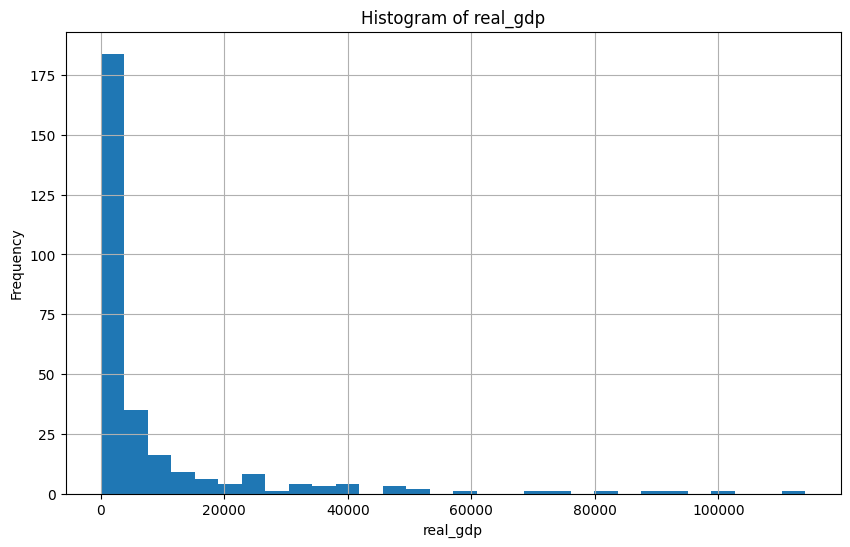

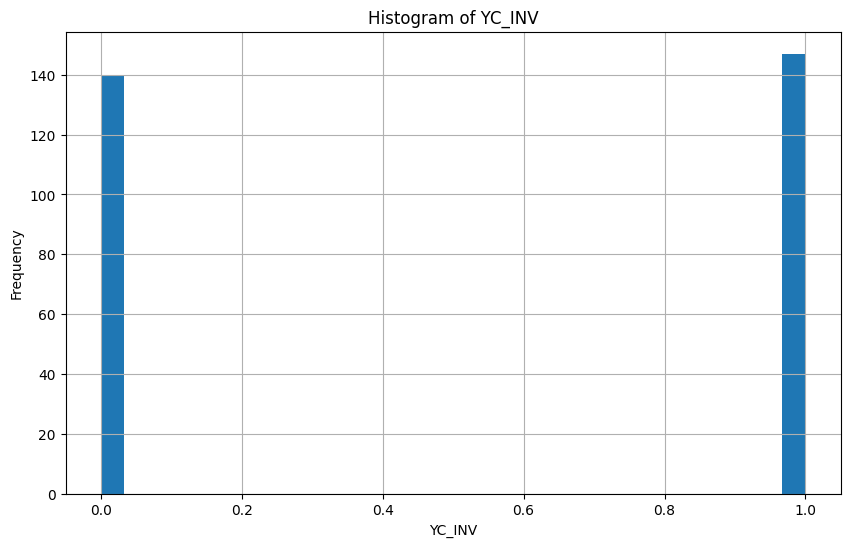

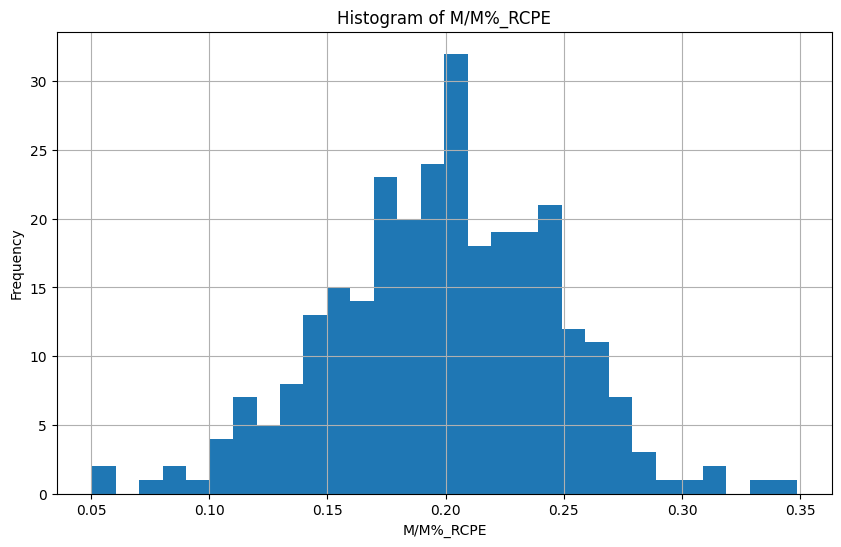

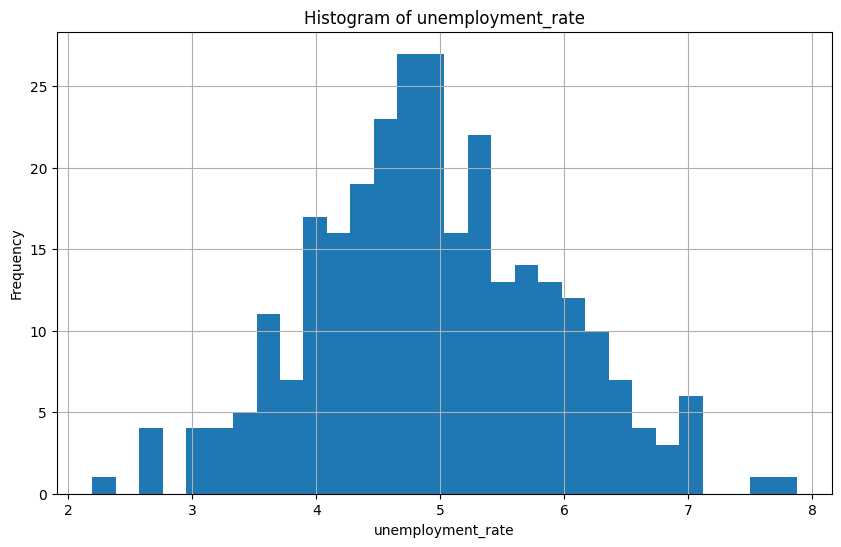

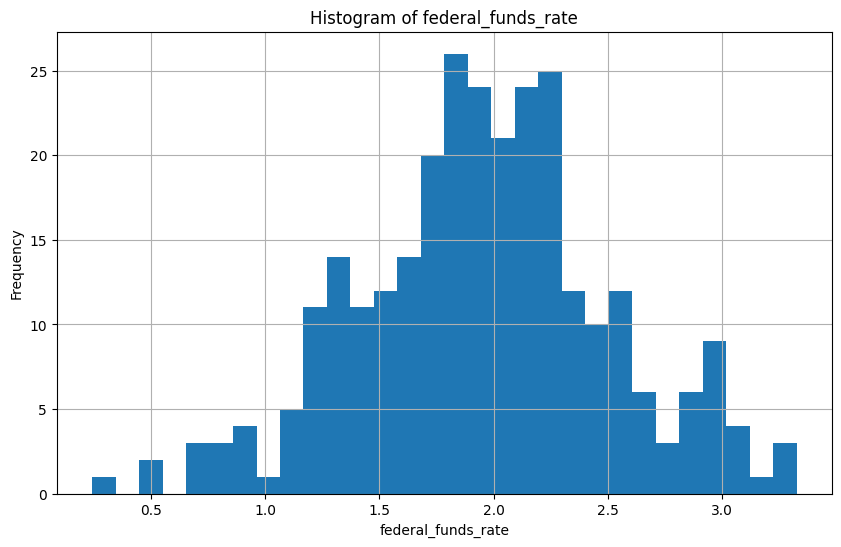

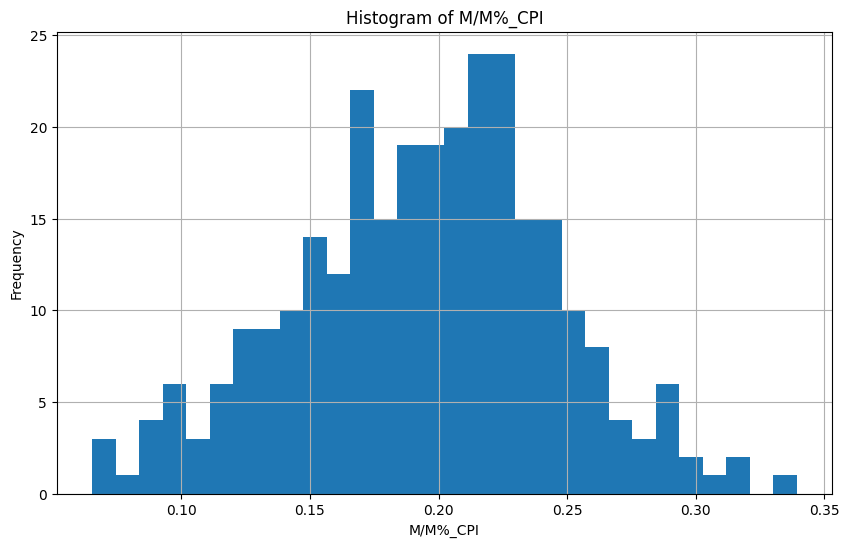

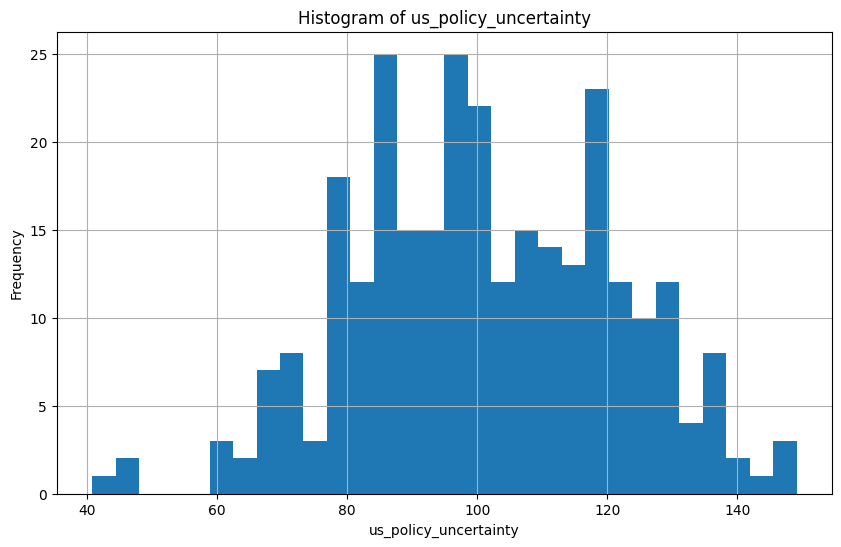

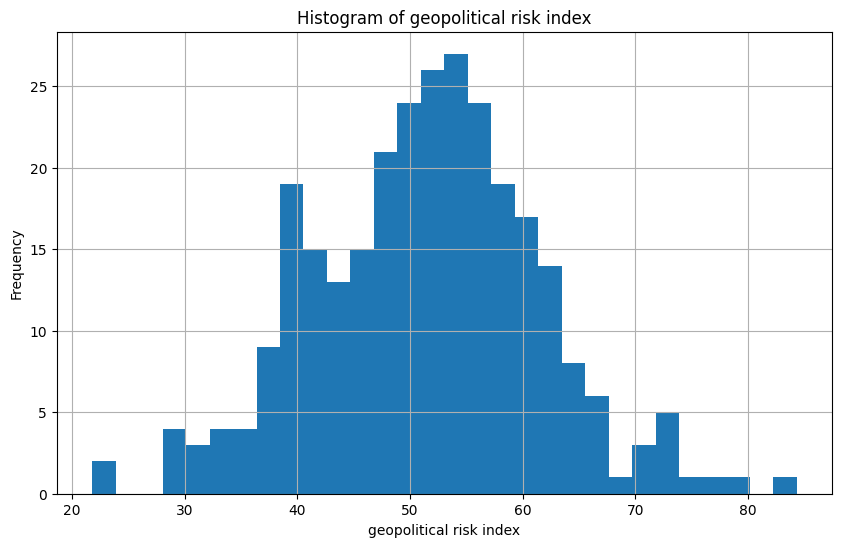

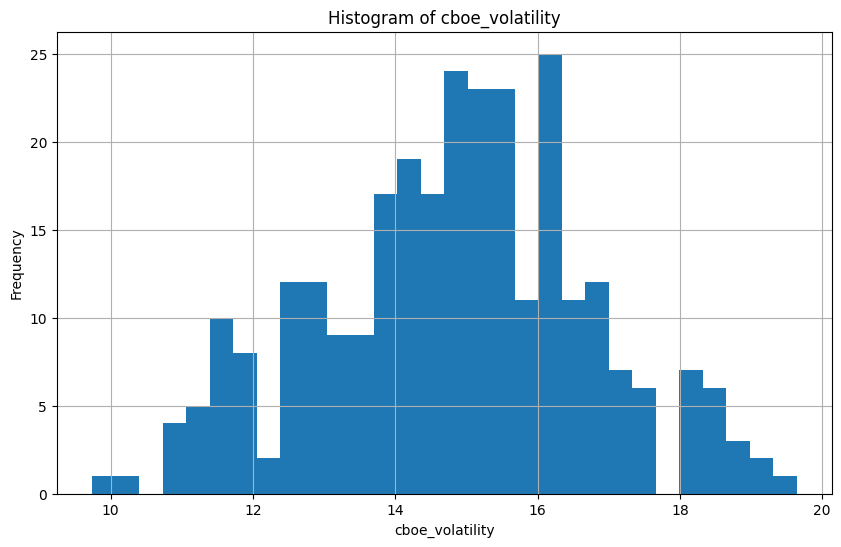

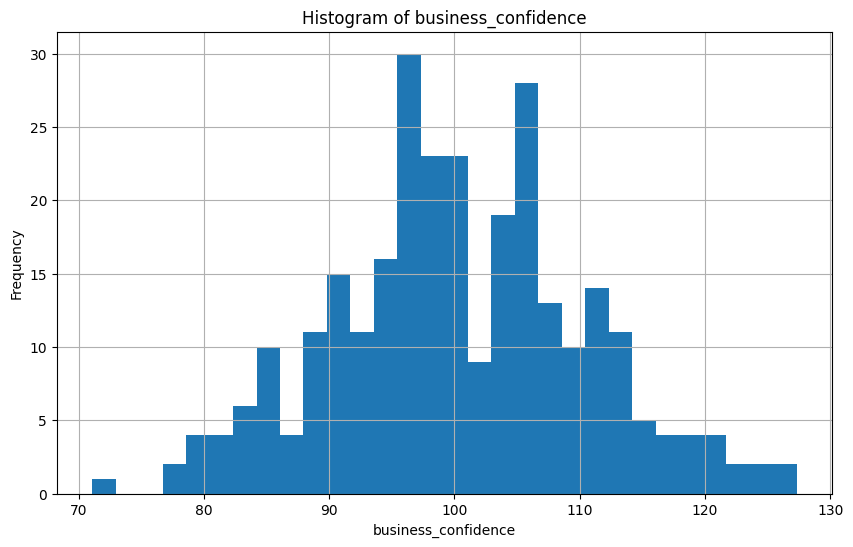

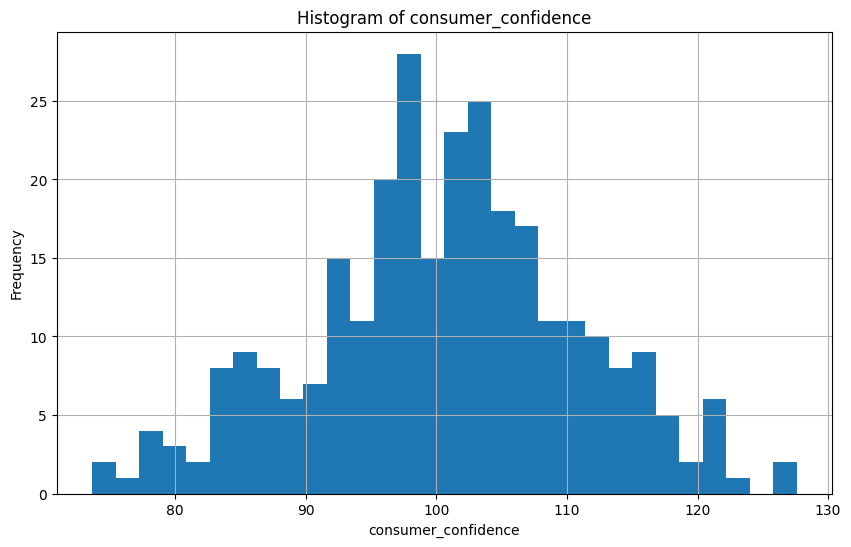

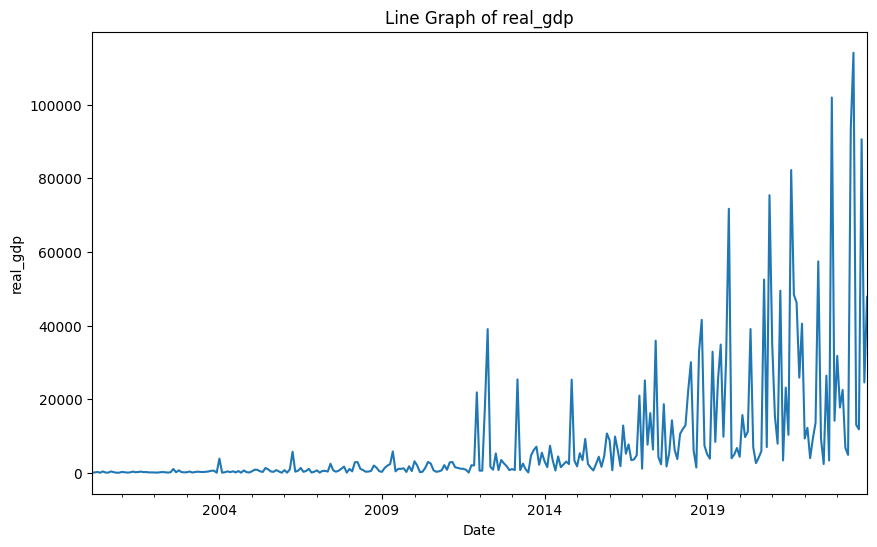

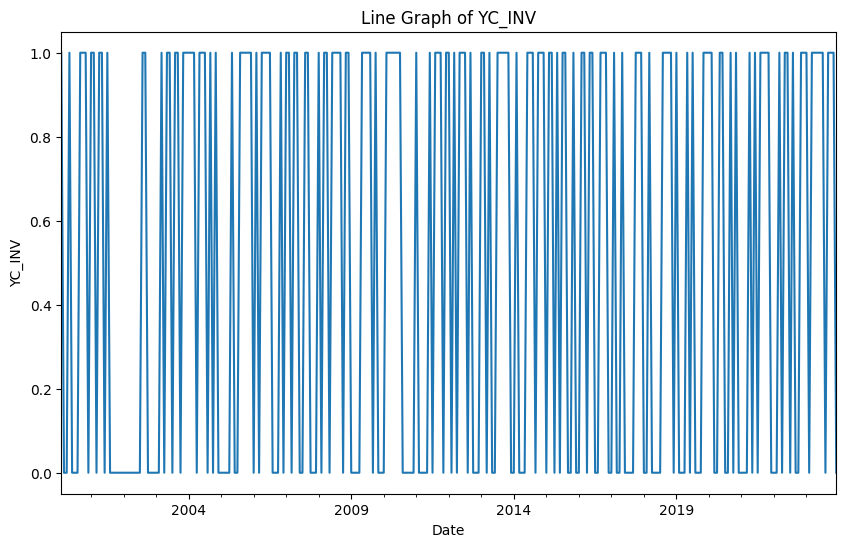

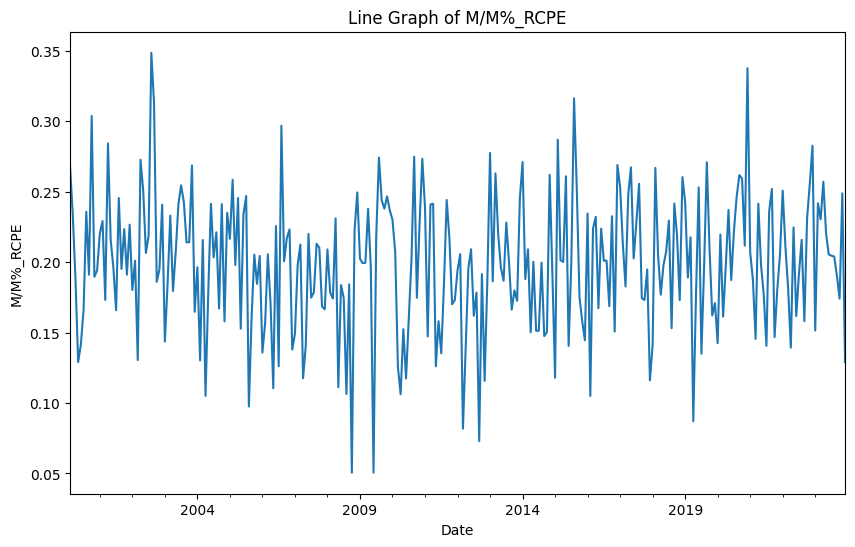

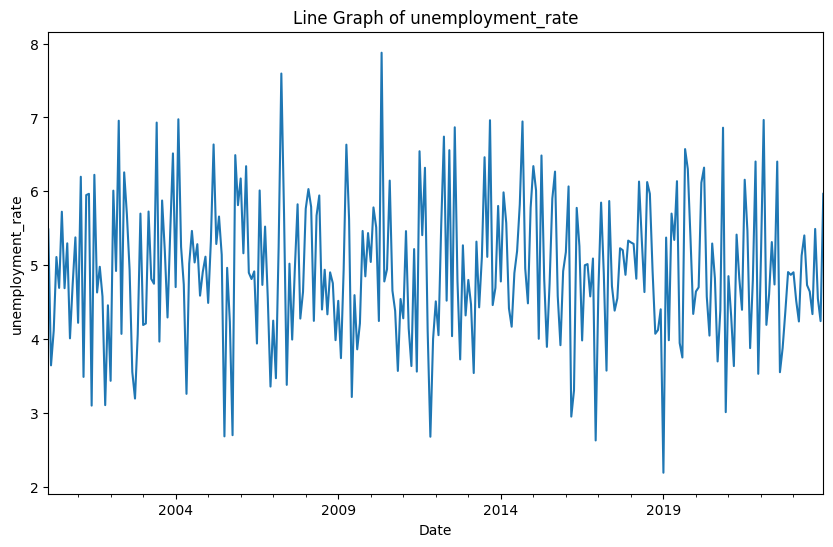

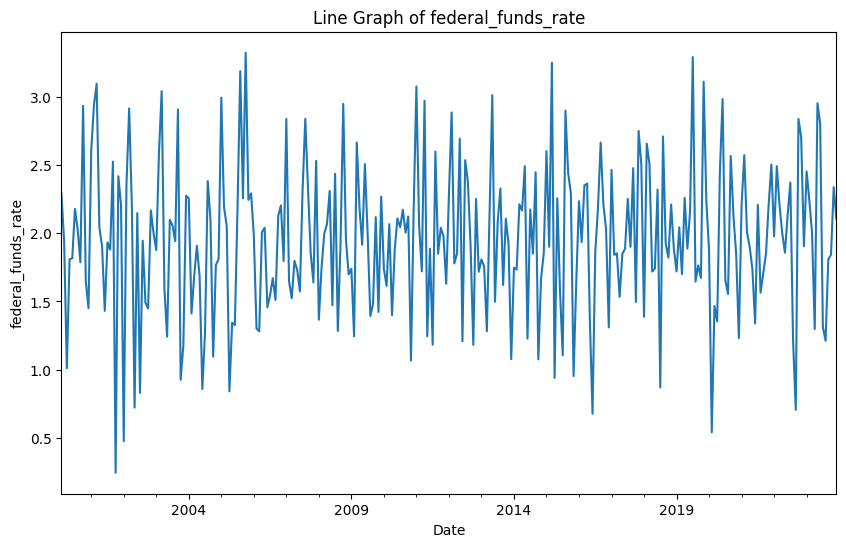

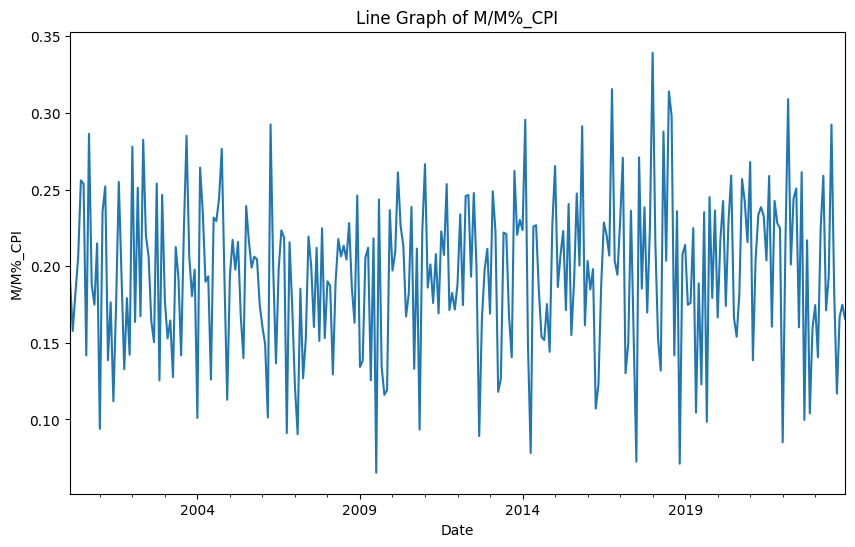

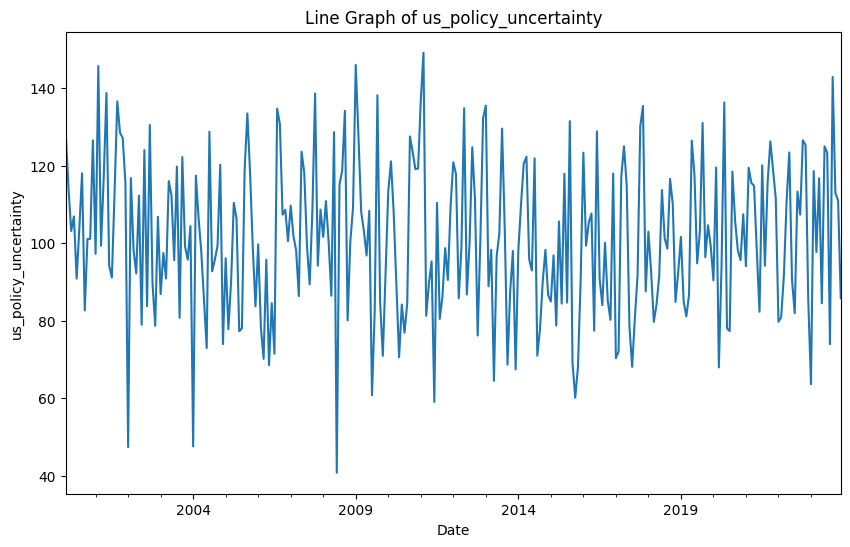

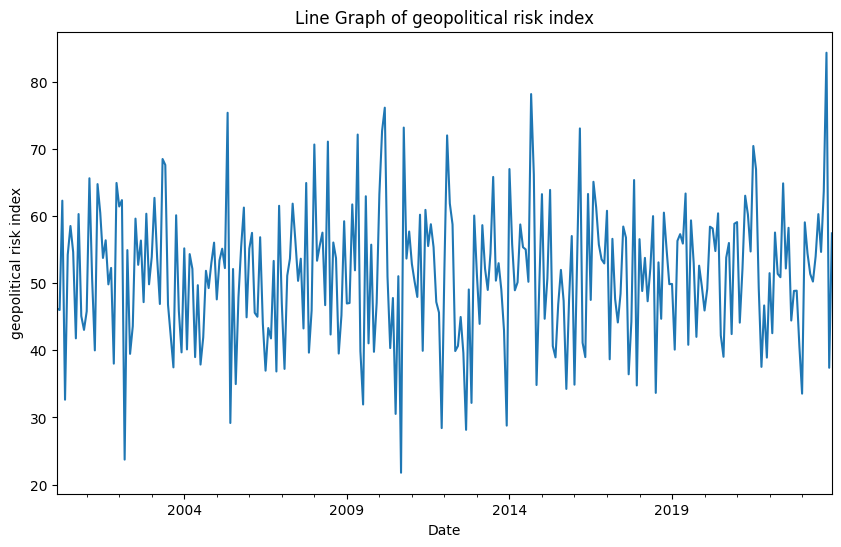

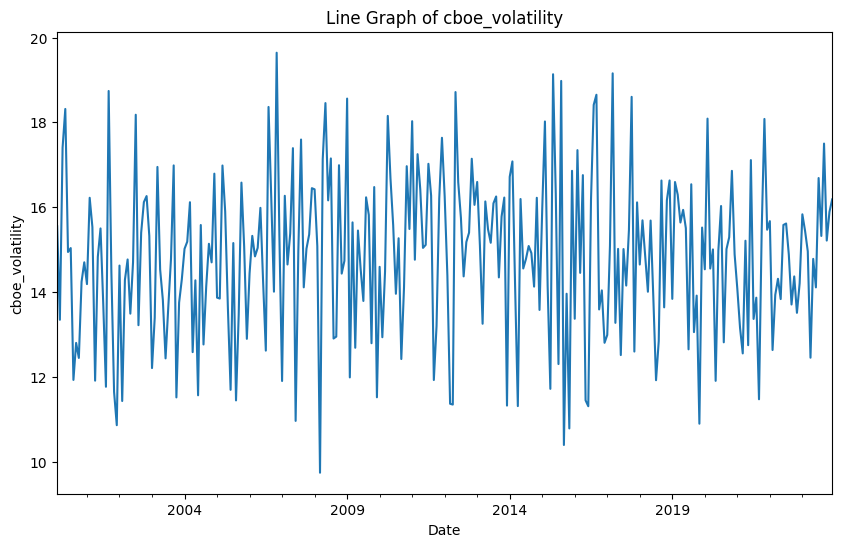

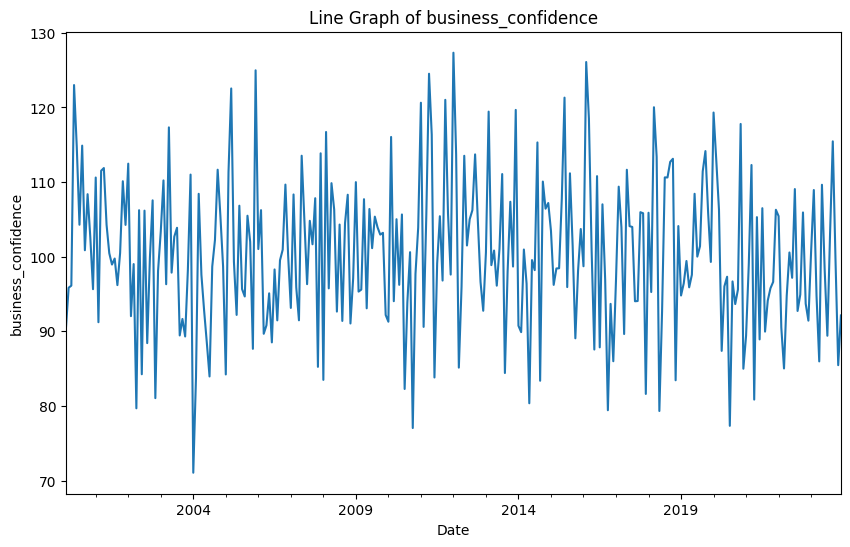

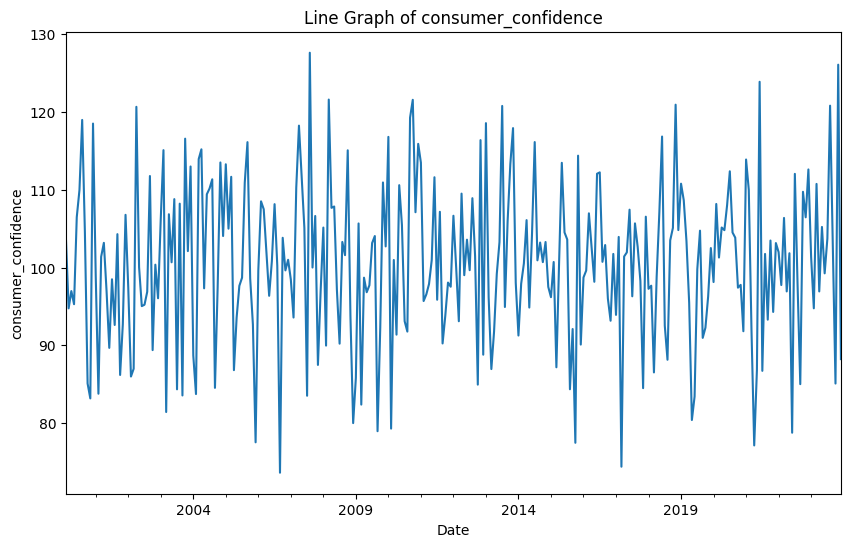

ADF Test for real_gdp:
ADF Statistic: 1.1431852157862836
p-value: 0.995568849974725
Critical Value 1%: -3.4546223782586534
Critical Value 5%: -2.8722253212300277
Critical Value 10%: -2.5724638500216264

ADF Test for YC_INV:
ADF Statistic: -16.39378364642934
p-value: 2.6785120290806933e-29
Critical Value 1%: -3.4534232986669546
Critical Value 5%: -2.8716994185534745
Critical Value 10%: -2.5721833625116144

ADF Test for M/M%_RCPE:
ADF Statistic: -7.212617069714727
p-value: 2.2145912426032078e-10
Critical Value 1%: -3.453922368485787
Critical Value 5%: -2.871918329081633
Critical Value 10%: -2.5723001147959184

ADF Test for unemployment_rate:
ADF Statistic: -17.42144656210821
p-value: 4.8233106109001115e-30
Critical Value 1%: -3.4534232986669546
Critical Value 5%: -2.8716994185534745
Critical Value 10%: -2.5721833625116144

ADF Test for federal_funds_rate:
ADF Statistic: -9.755838155902001
p-value: 7.794196499628685e-17
Critical Value 1%: -3.4537536300652
Critical Value 5%: -2.87184431801

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


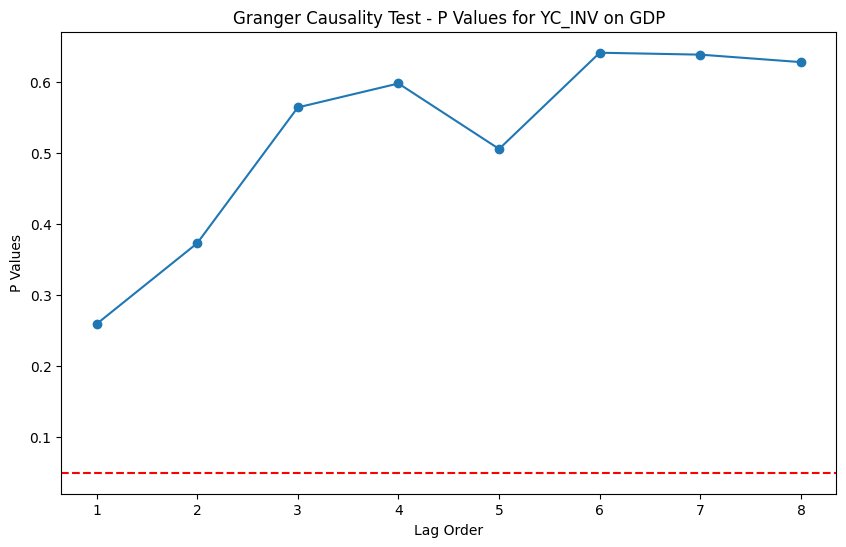

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


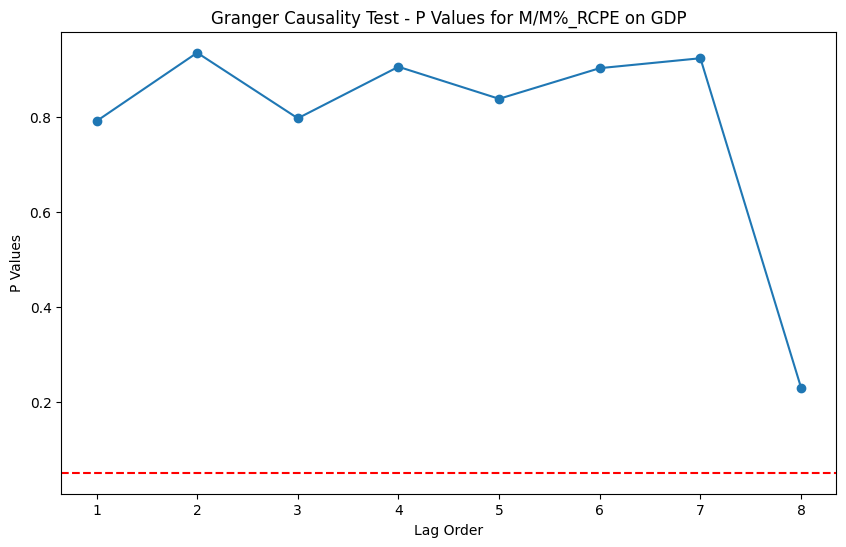

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


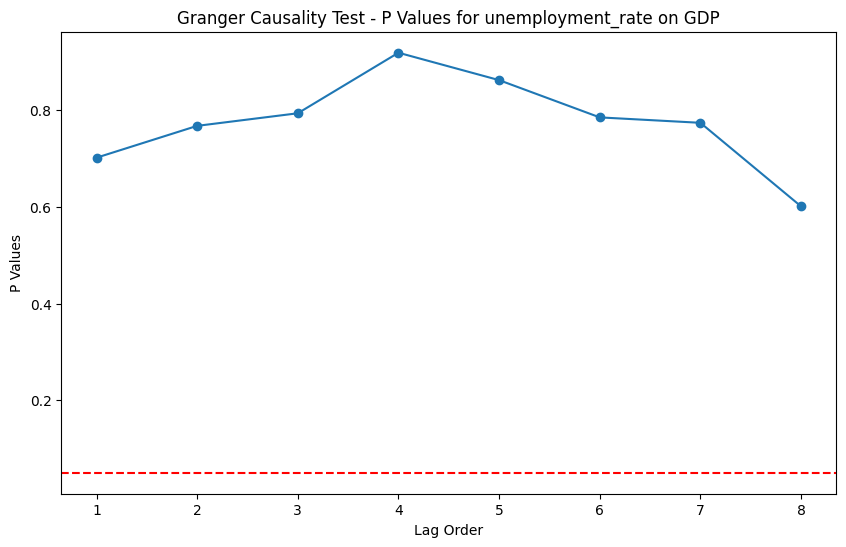

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


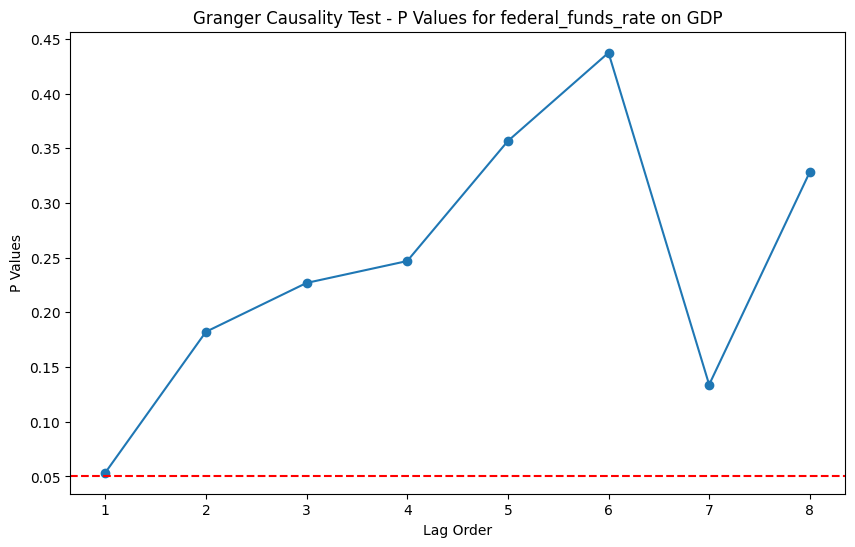

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


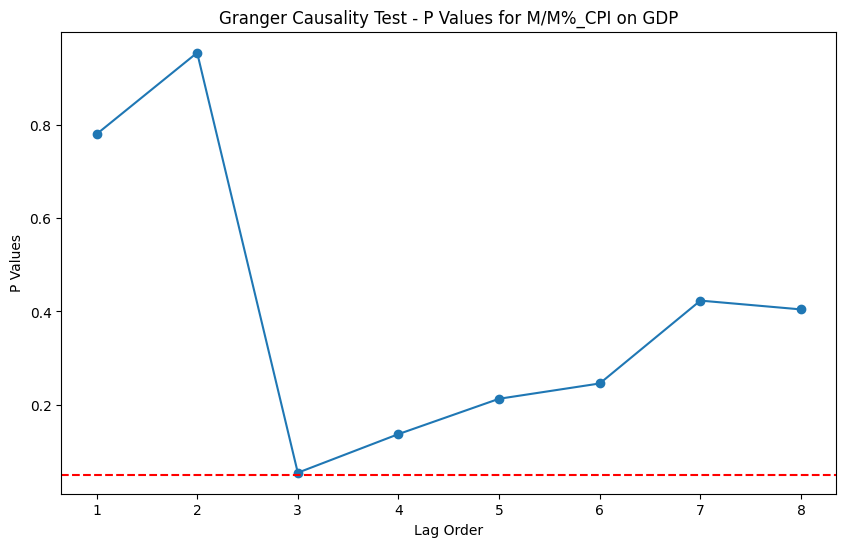

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


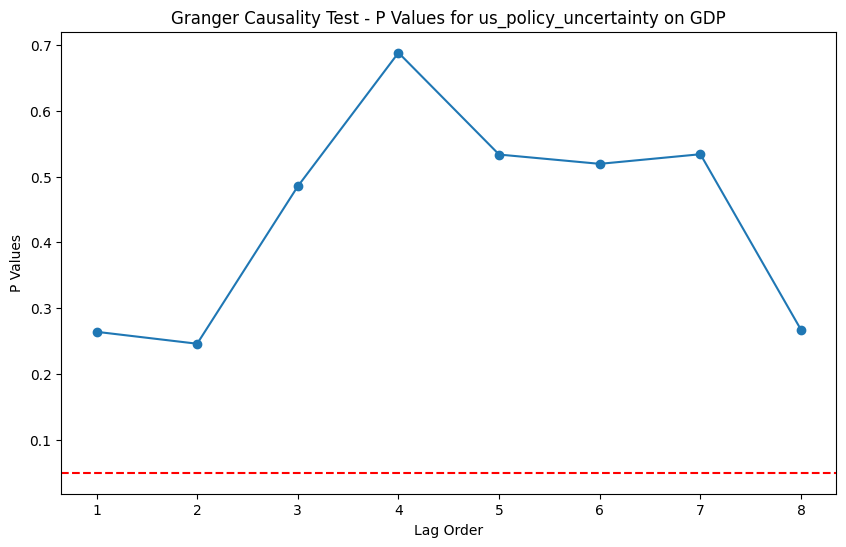

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


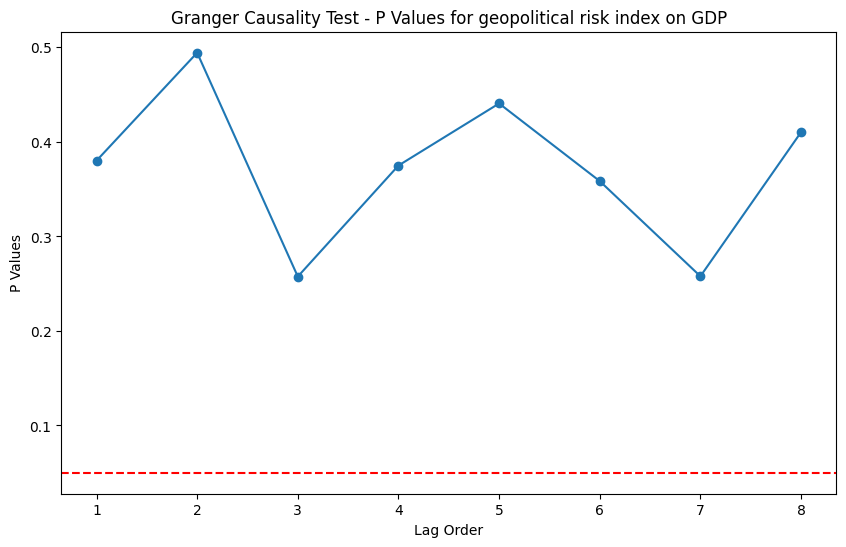

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


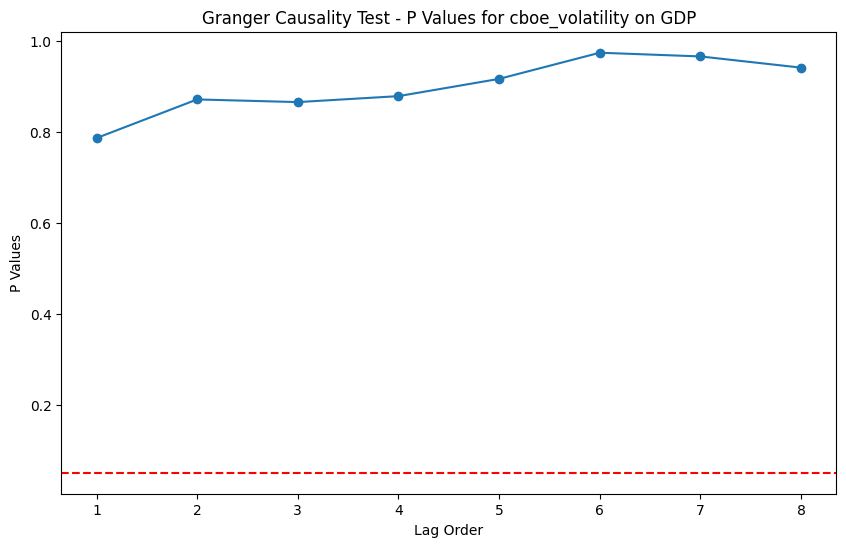

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


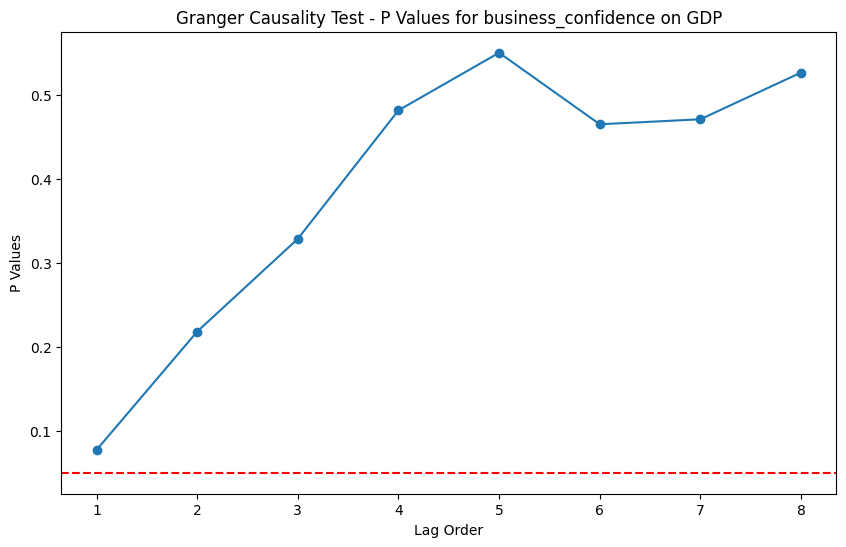

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


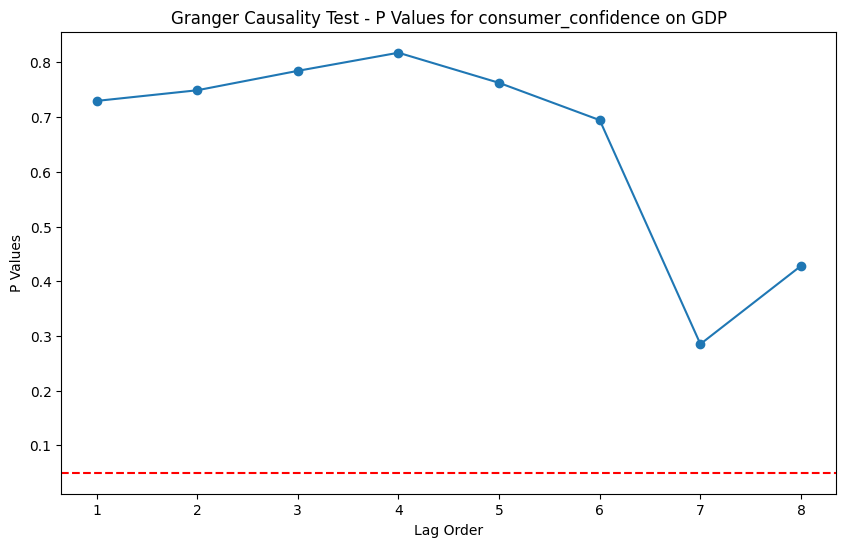

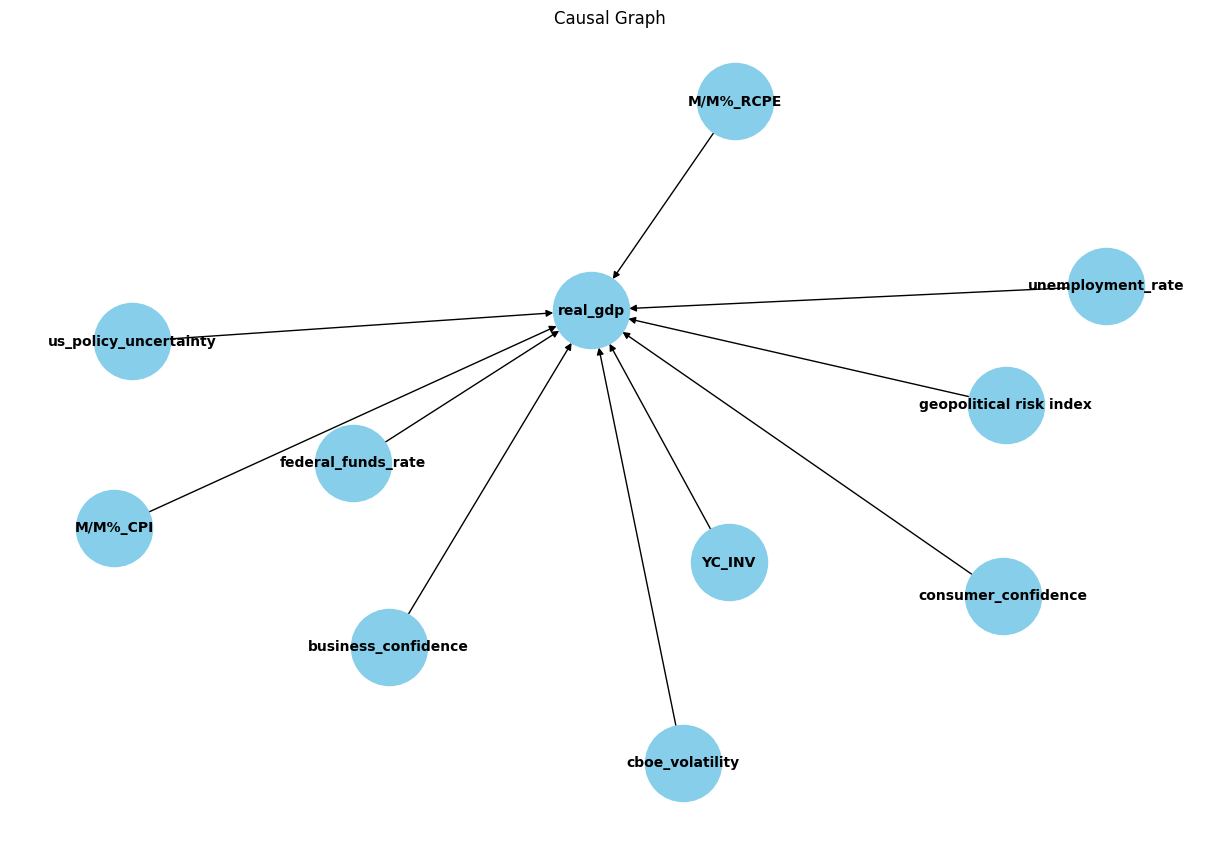

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Define the simulate_data function
def simulate_data():
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    dates = pd.date_range(start=start_date, end=end_date, freq='MS')
    
    # Economic variables
    columns = ['real_gdp', 'YC_INV', 'M/M%_RCPE', 'unemployment_rate', 'federal_funds_rate', 
               'M/M%_CPI', 'us_policy_uncertainty', 'geopolitical risk index', 
               'cboe_volatility', 'business_confidence', 'consumer_confidence']
    df = pd.DataFrame(index=dates, columns=columns)
    
    # Simulate each variable with random walk and shocks
    np.random.seed(0)
    for t in range(len(dates)):
        df.iloc[t]['real_gdp'] = 100 * np.exp(0.02 * t + np.random.normal(0, 1))
        df.iloc[t]['YC_INV'] = np.random.randint(0, 2)
        df.iloc[t]['M/M%_RCPE'] = np.random.normal(0.2, 0.05)
        df.iloc[t]['unemployment_rate'] = 5 + np.random.normal(0, 1)
        df.iloc[t]['federal_funds_rate'] = 2 + np.random.normal(0, 0.5)
        df.iloc[t]['M/M%_CPI'] = np.random.normal(0.2, 0.05)
        df.iloc[t]['us_policy_uncertainty'] = np.random.normal(100, 20)
        df.iloc[t]['geopolitical risk index'] = np.random.normal(50, 10)
        df.iloc[t]['cboe_volatility'] = 15 + np.random.normal(0, 2)
        df.iloc[t]['business_confidence'] = 100 + np.random.normal(0, 10)
        df.iloc[t]['consumer_confidence'] = 100 + np.random.normal(0, 10)

    # Calculate monthly changes for relevant columns
    for col in ['M/M%_RCPE', 'unemployment_rate', 'federal_funds_rate', 'M/M%_CPI',
                'us_policy_uncertainty', 'geopolitical risk index', 'cboe_volatility',
                'business_confidence', 'consumer_confidence']:
        df[col + ' % Change'] = df[col].pct_change() * 100
    
    # Drop rows with any NaN values (typically the first row)
    df = df.dropna()

    return df

# Simulate Data
data = simulate_data()

# Plot histograms for selected variables
selected_variables = ['real_gdp', 'YC_INV', 'M/M%_RCPE', 'unemployment_rate', 'federal_funds_rate', 
                      'M/M%_CPI', 'us_policy_uncertainty', 'geopolitical risk index', 
                      'cboe_volatility', 'business_confidence', 'consumer_confidence']

for var in selected_variables:
    plt.figure(figsize=(10, 6))
    data[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + var)
    plt.show()

# Plot time series for selected variables
for var in selected_variables:
    plt.figure(figsize=(10, 6))
    data[var].plot()
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.title('Line Graph of ' + var)
    plt.show()

# Perform Augmented Dickey-Fuller (ADF) Test
adf_results = {}
for var in selected_variables:
    result = adfuller(data[var])
    adf_results[var] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

# Print ADF results
for var, result in adf_results.items():
    print(f'ADF Test for {var}:')
    print(f'ADF Statistic: {result["ADF Statistic"]}')
    print(f'p-value: {result["p-value"]}')
    for key, value in result['Critical Values'].items():
        print(f'Critical Value {key}: {value}')
    print()

# Perform Granger Causality Test for selected variables
variables_to_test = ['YC_INV', 'M/M%_RCPE', 'unemployment_rate', 'federal_funds_rate', 
                     'M/M%_CPI', 'us_policy_uncertainty', 'geopolitical risk index', 
                     'cboe_volatility', 'business_confidence', 'consumer_confidence']

for var in variables_to_test:
    results = grangercausalitytests(data[['real_gdp', var]], maxlag=8, verbose=False)
    lag_orders = sorted(results.keys())
    p_values = [results[lag_order][0]['ssr_ftest'][1] for lag_order in lag_orders]
    
    plt.figure(figsize=(10, 6))
    plt.plot(lag_orders, p_values, marker='o', linestyle='-')
    plt.xlabel('Lag Order')
    plt.ylabel('P Values')
    plt.title(f'Granger Causality Test - P Values for {var} on GDP')
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.show()

# Create and visualize causal graph using networkx
edges = [
    ('YC_INV', 'real_gdp'),
    ('M/M%_RCPE', 'real_gdp'),
    ('unemployment_rate', 'real_gdp'),
    ('federal_funds_rate', 'real_gdp'),
    ('M/M%_CPI', 'real_gdp'),
    ('us_policy_uncertainty', 'real_gdp'),
    ('geopolitical risk index', 'real_gdp'),
    ('cboe_volatility', 'real_gdp'),
    ('business_confidence', 'real_gdp'),
    ('consumer_confidence', 'real_gdp')
]

G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Causal Graph')
plt.show()


C:\Users\ellac\AppData\Local\Temp\ipykernel_33488\1661912629.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=start_date, end=end_date, freq='M')
c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF Test for real_gdp:
ADF Statistic: -10.878620011513814
p-value: 1.3120773518855443e-19
Critical Value 1%: -3.454988209954765
Critical Value 5%: -2.8723857312734613
Critical Value 10%: -2.572549407997327

ADF Test for YC_INV:
ADF Statistic: -15.625137823866798
p-value: 1.7125594841203627e-28
Critical Value 1%: -3.4548957220044336
Critical Value 5%: -2.8723451788613157
Critical Value 10%: -2.572527778361272

ADF Test for RPCE:
ADF Statistic: -10.583730551787673
p-value: 6.800877108240182e-19
Critical Value 1%: -3.454988209954765
Critical Value 5%: -2.8723857312734613
Critical Value 10%: -2.572549407997327

ADF Test for unemployment_rate:
ADF Statistic: -9.92951179752856
p-value: 2.8475480127315583e-17
Critical Value 1%: -3.4550813975770827
Critical Value 5%: -2.8724265892710914
Critical Value 10%: -2.5725712007462582

ADF Test for federal_funds_rate:
ADF Statistic: -14.598287277353739
p-value: 4.205875998829306e-27
Critical Value 1%: -3.4548957220044336
Critical Value 5%: -2.872345178

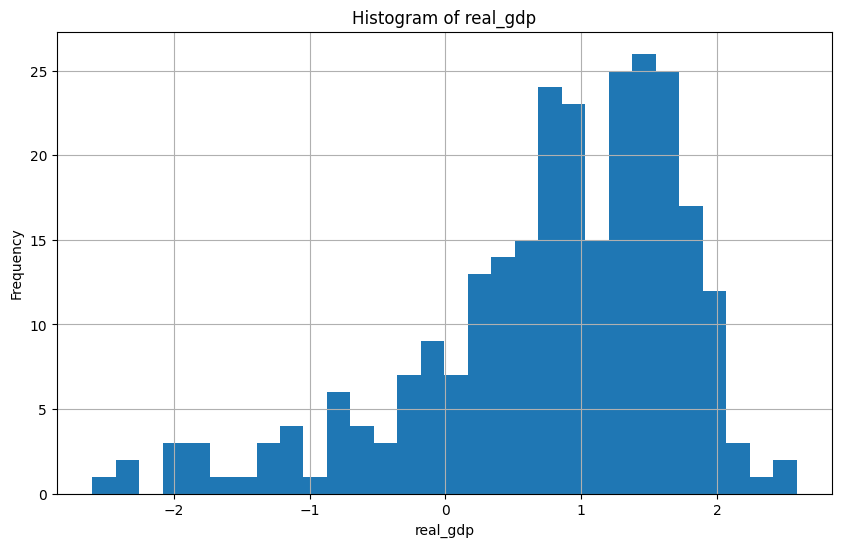

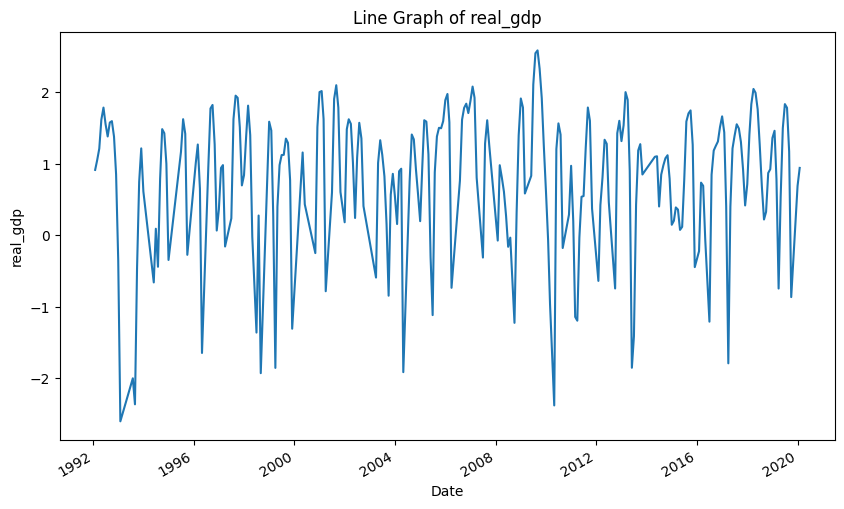

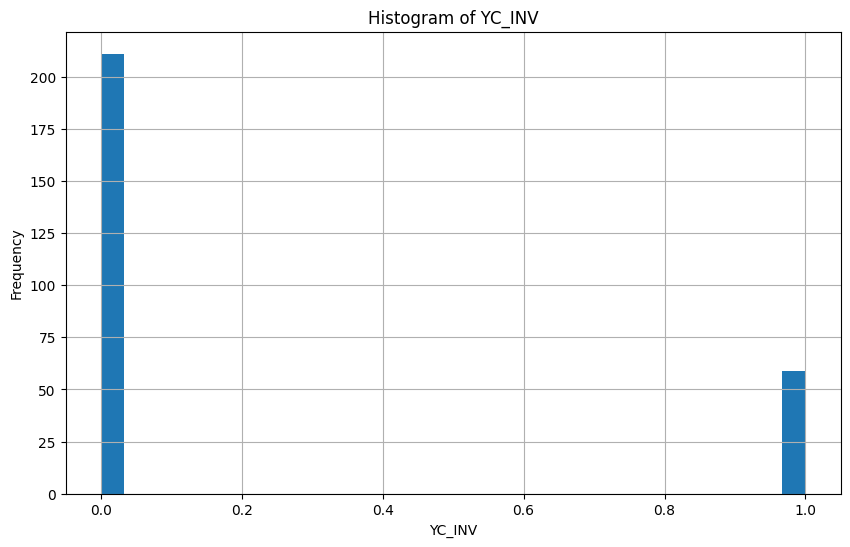

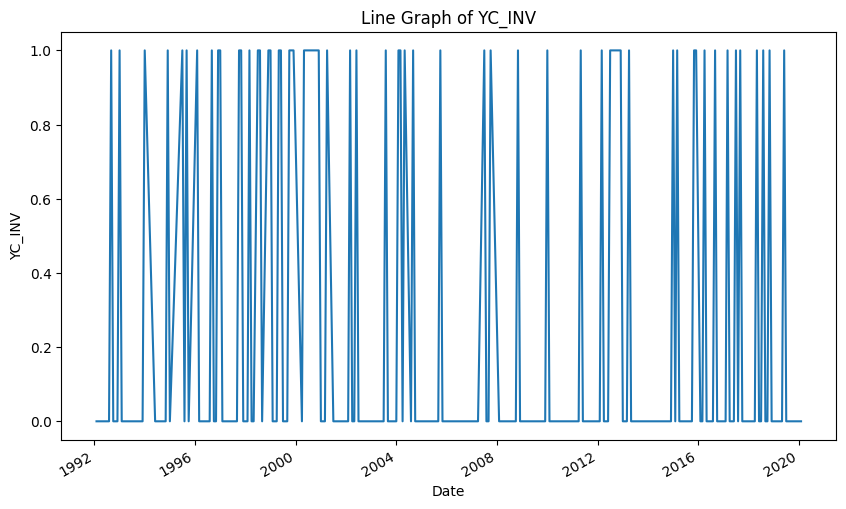

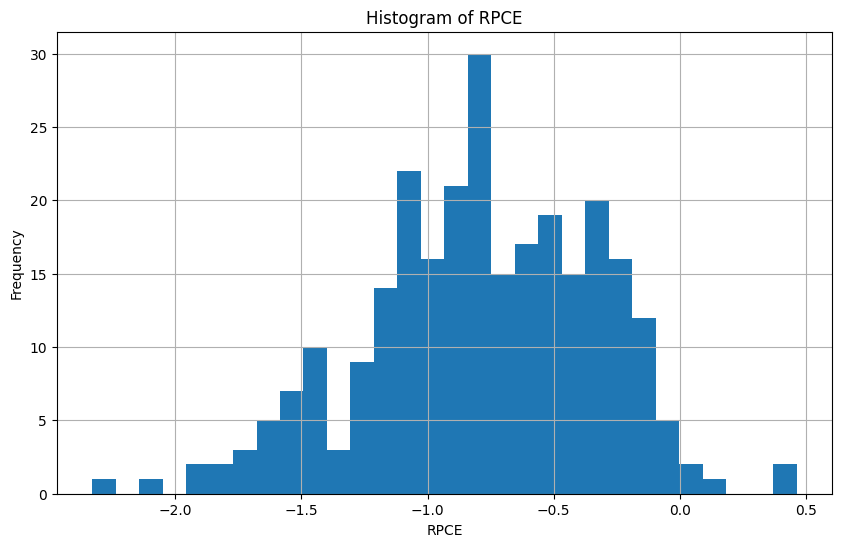

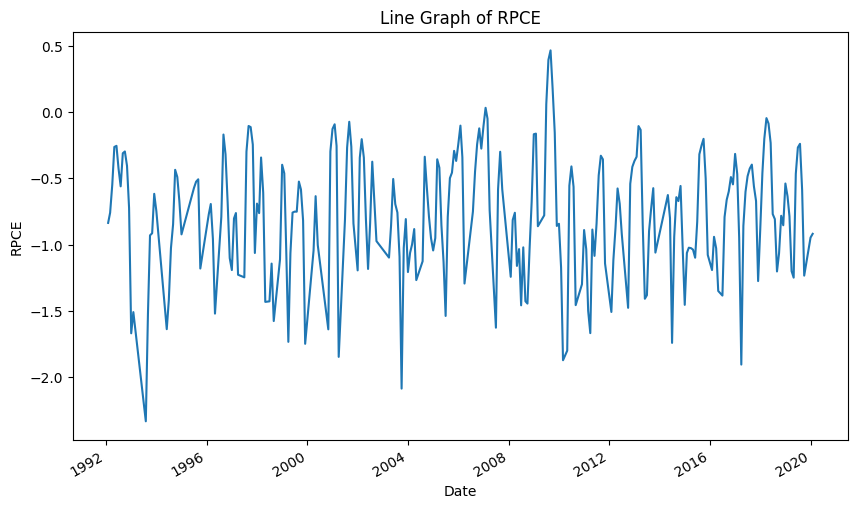

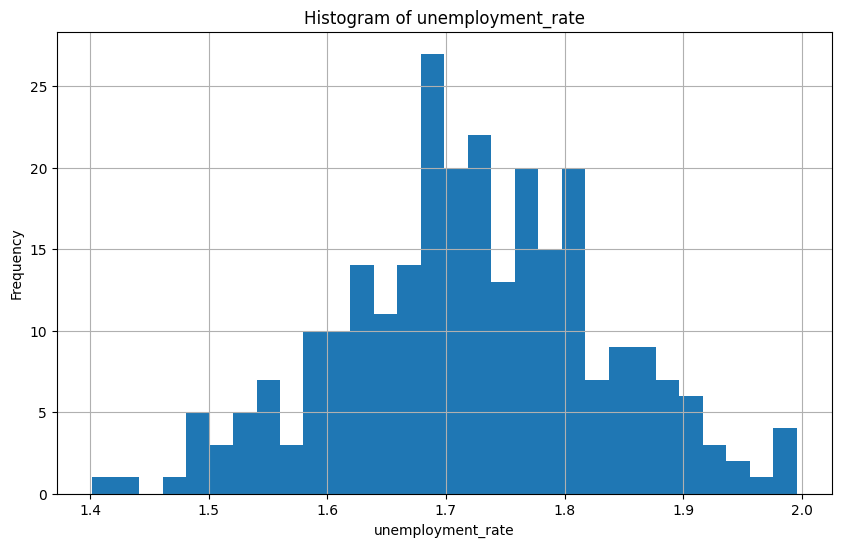

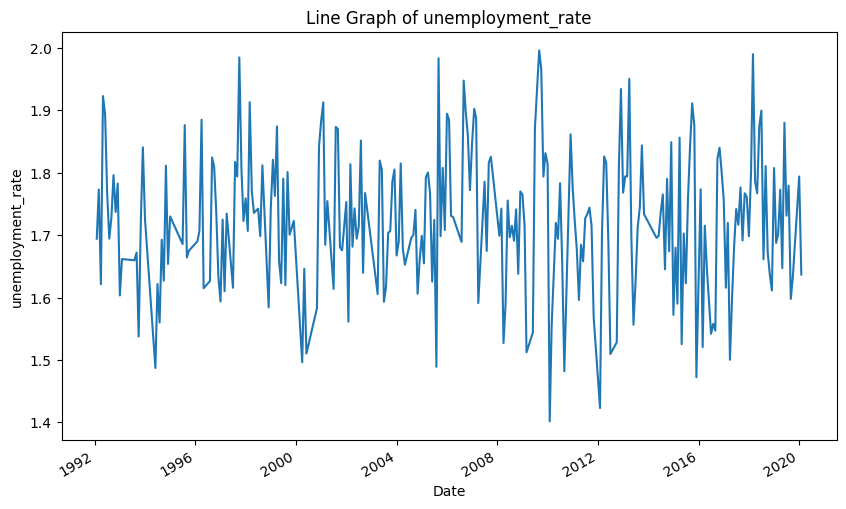

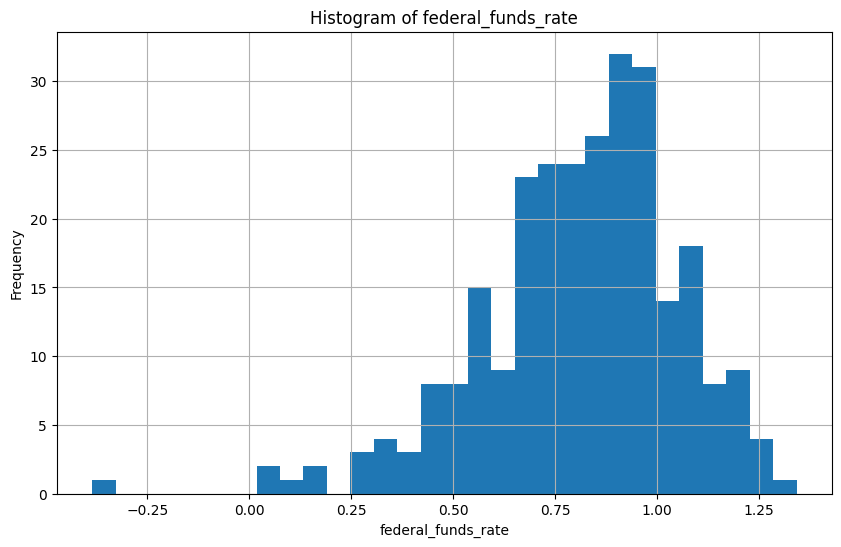

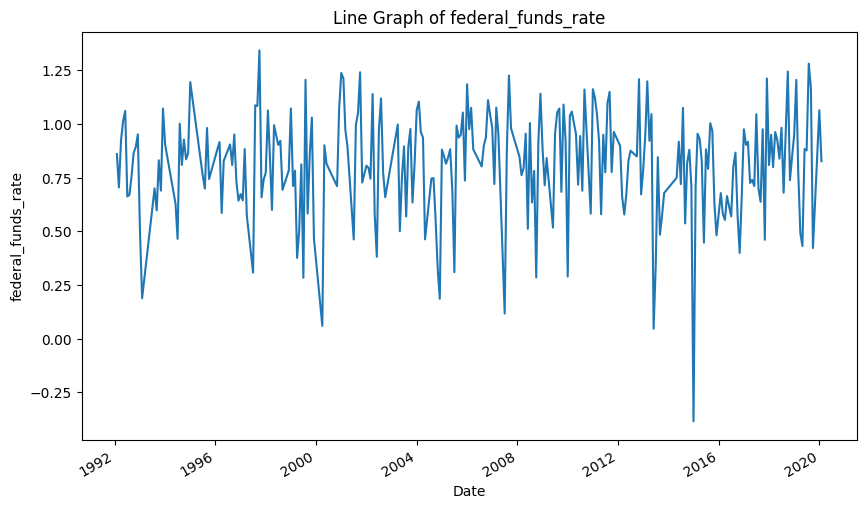

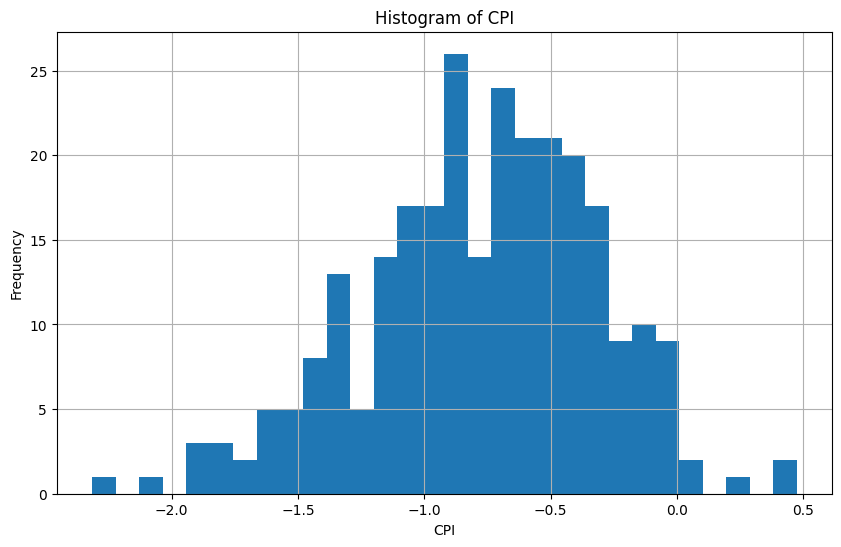

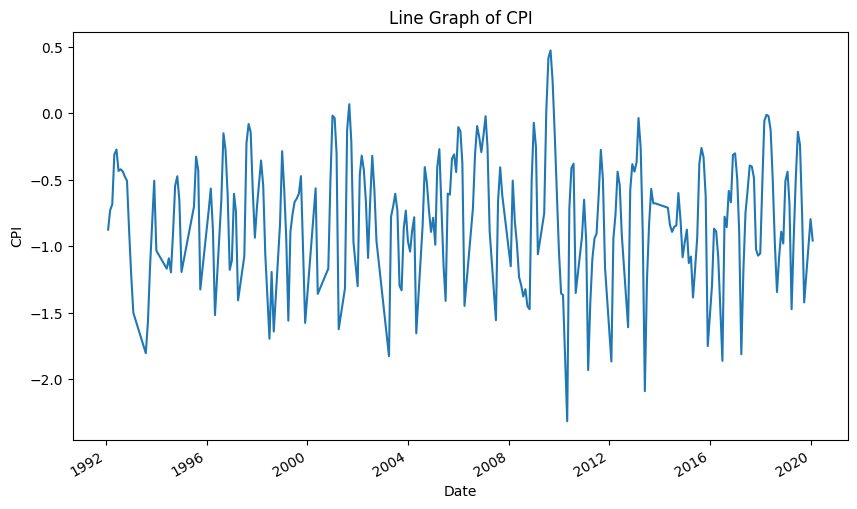

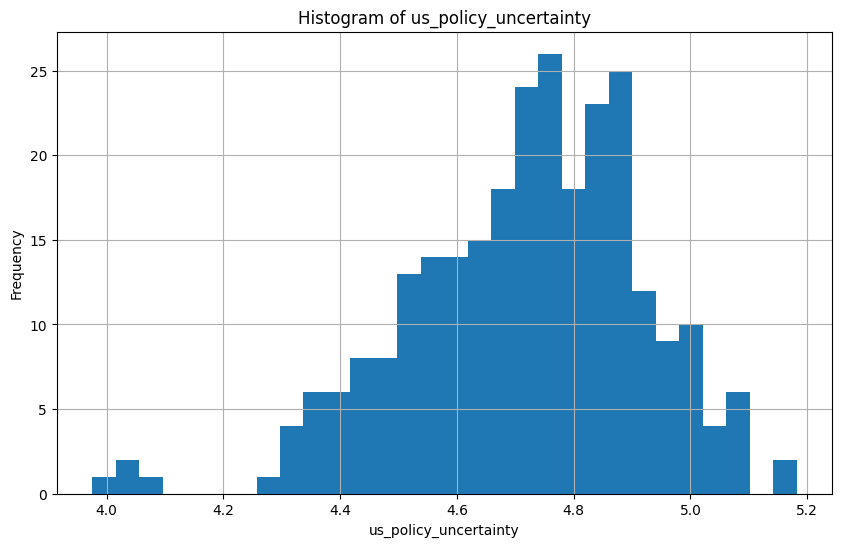

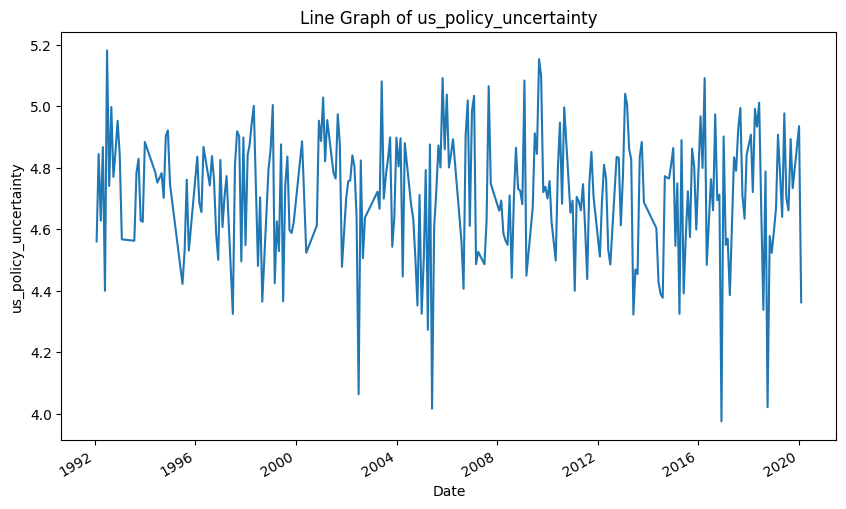

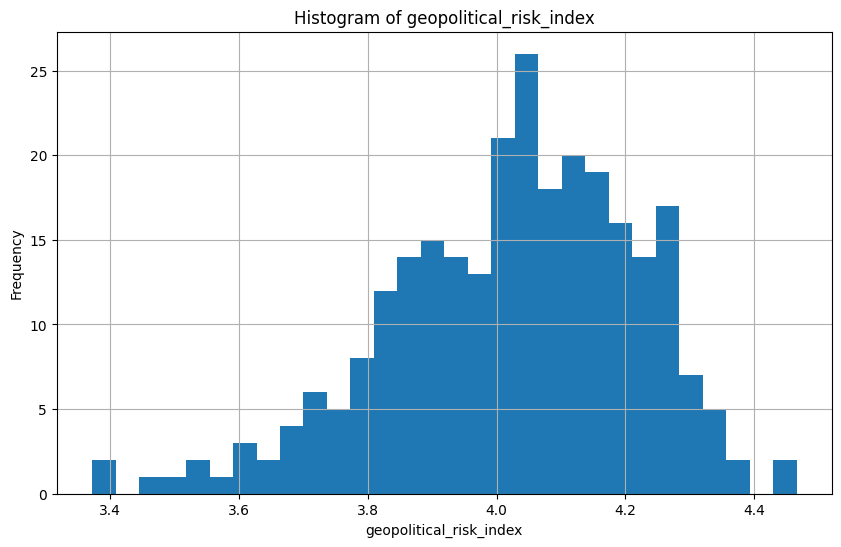

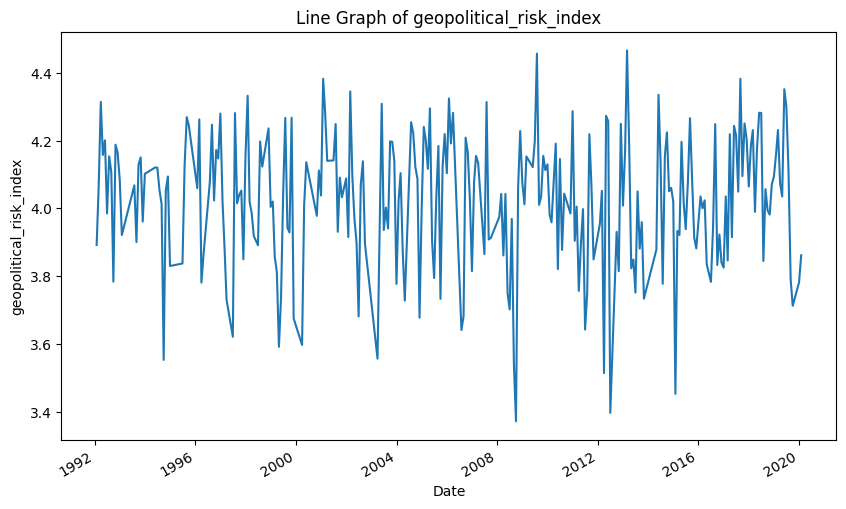

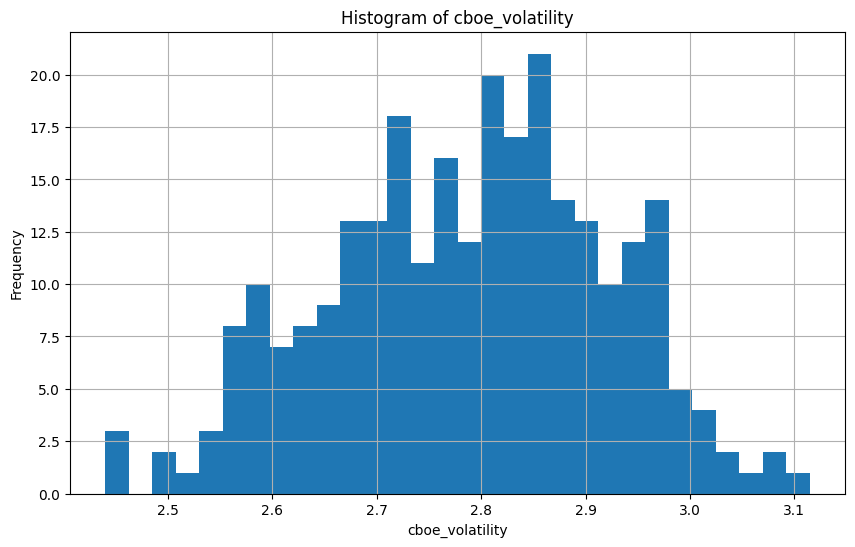

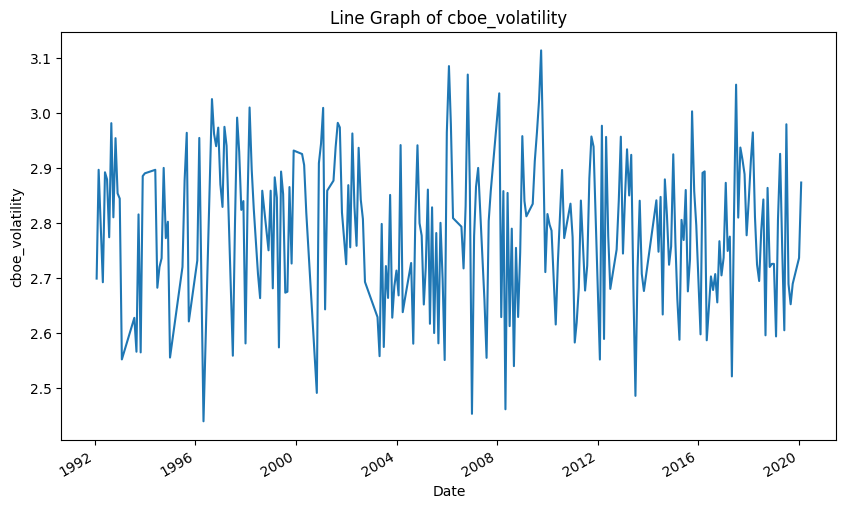

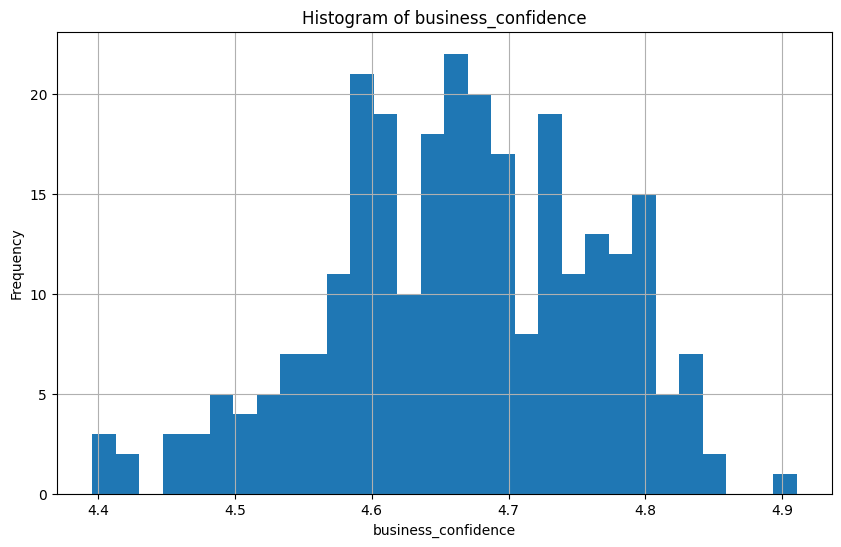

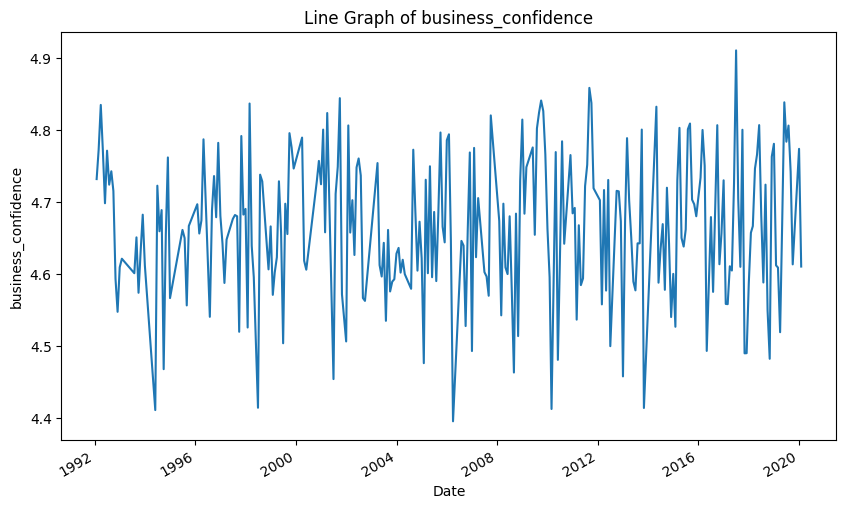

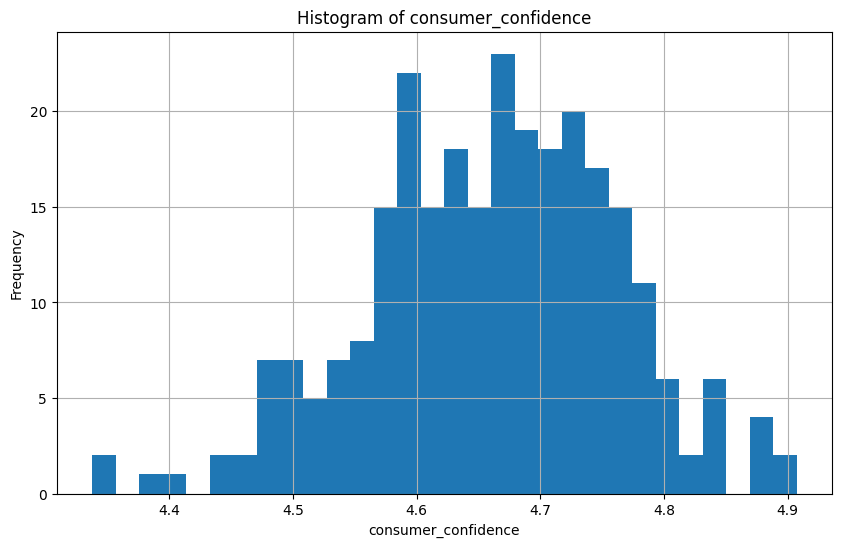

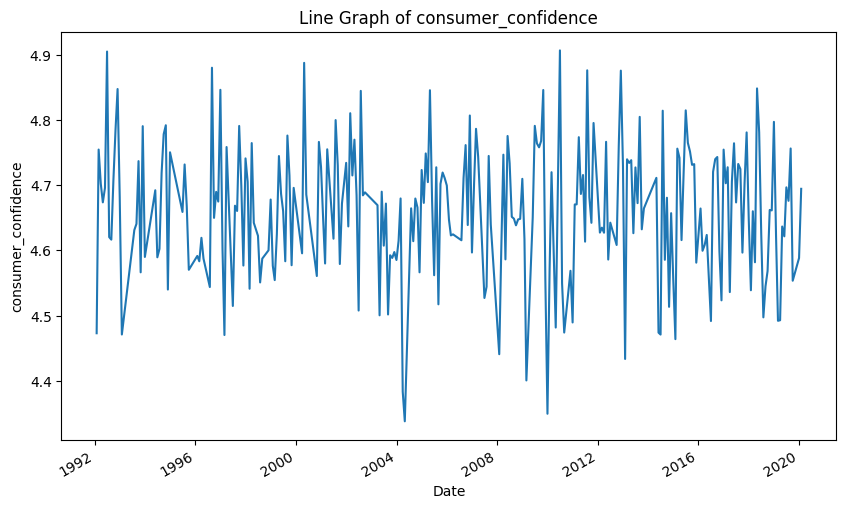

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


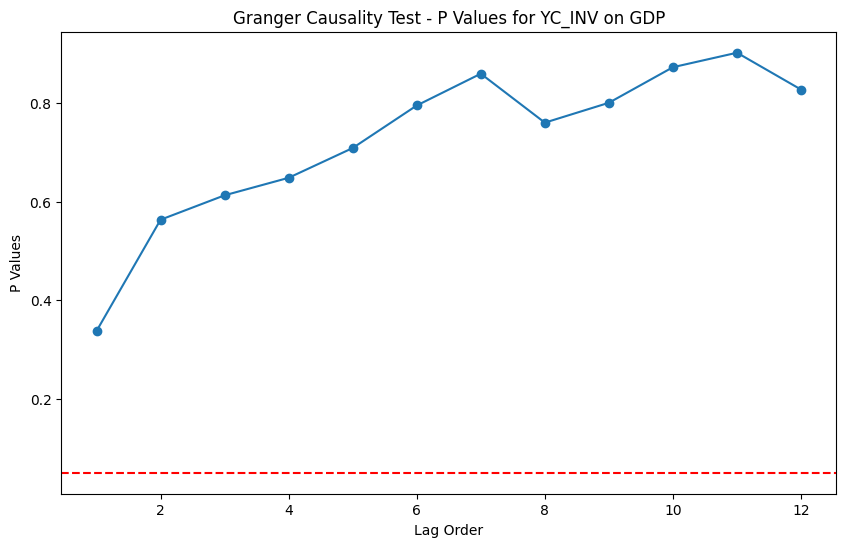

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


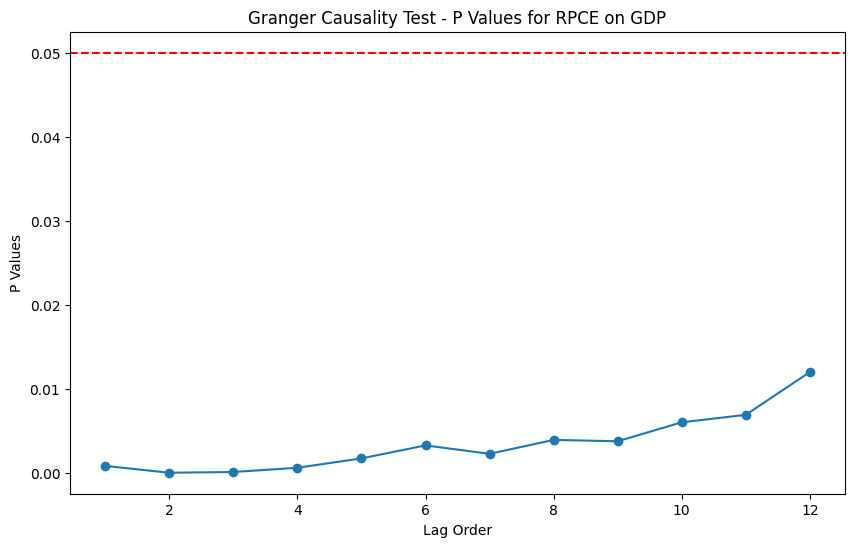

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


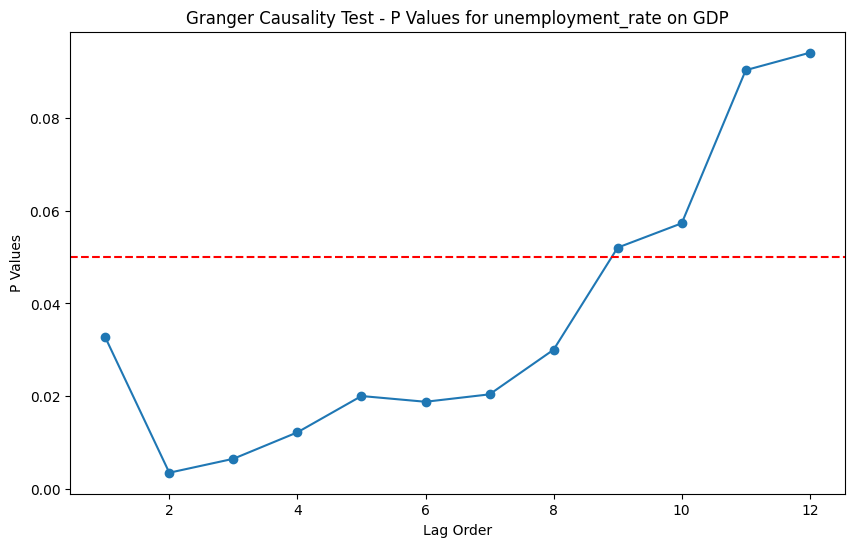

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


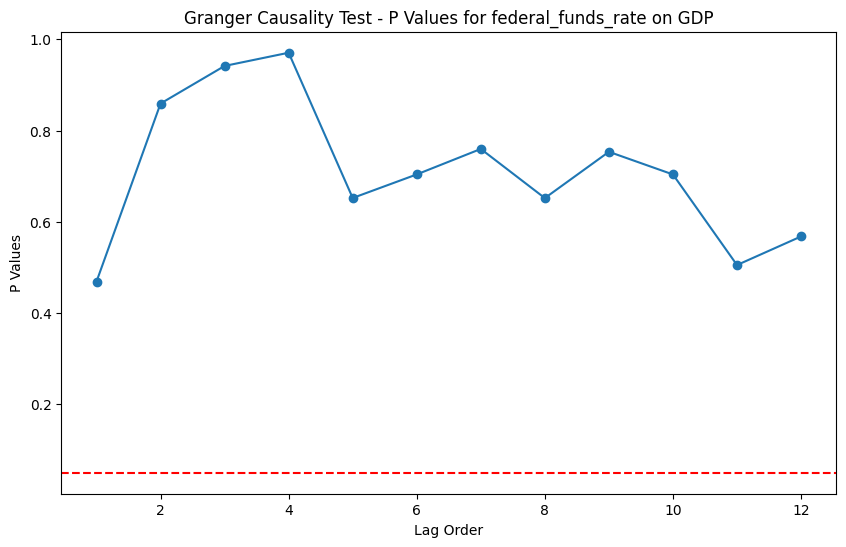

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


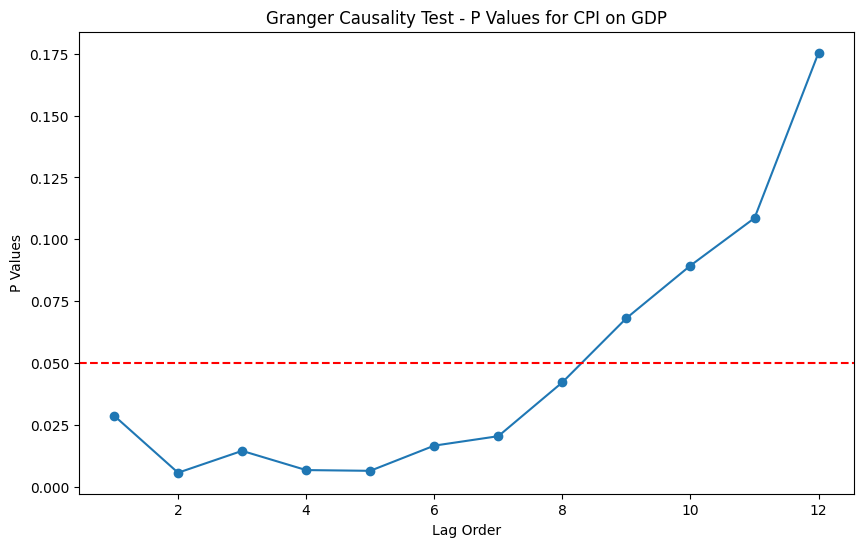

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


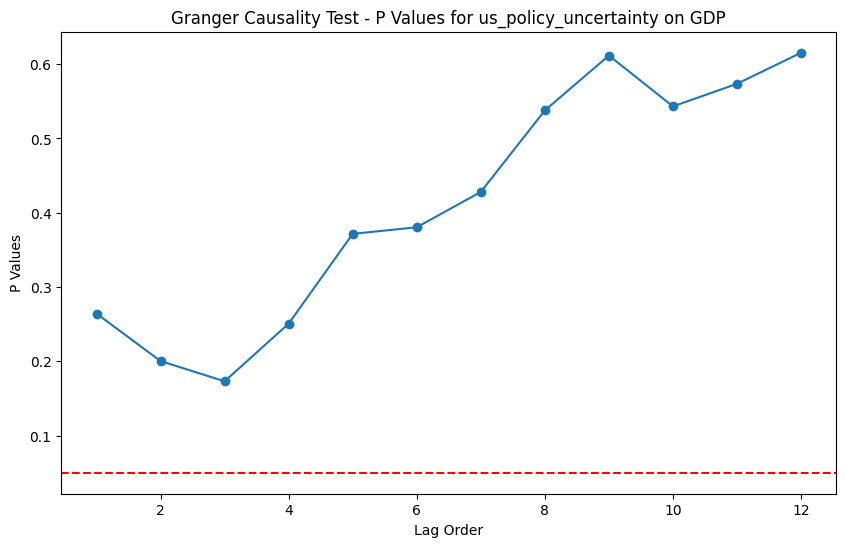

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


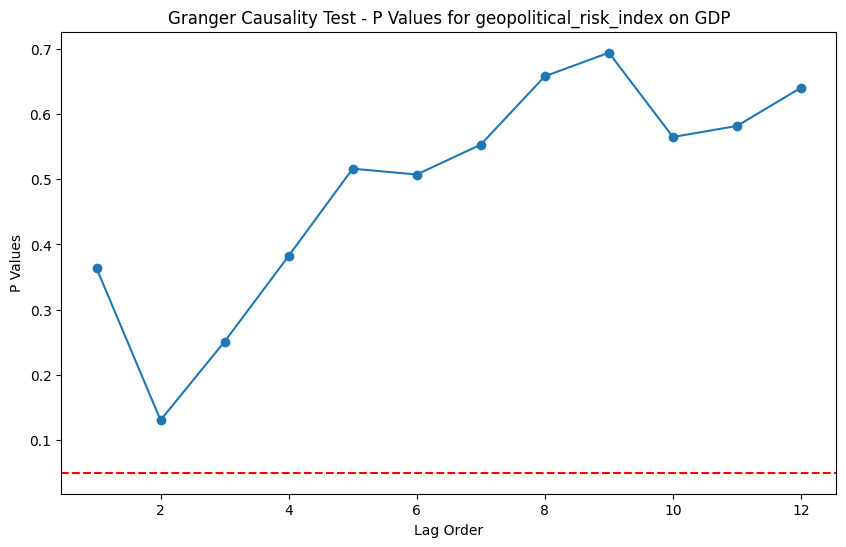

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


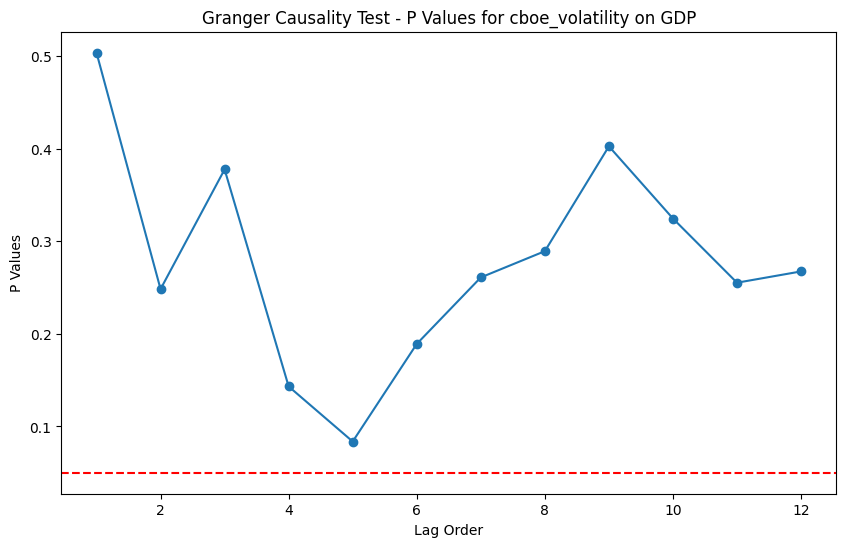

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


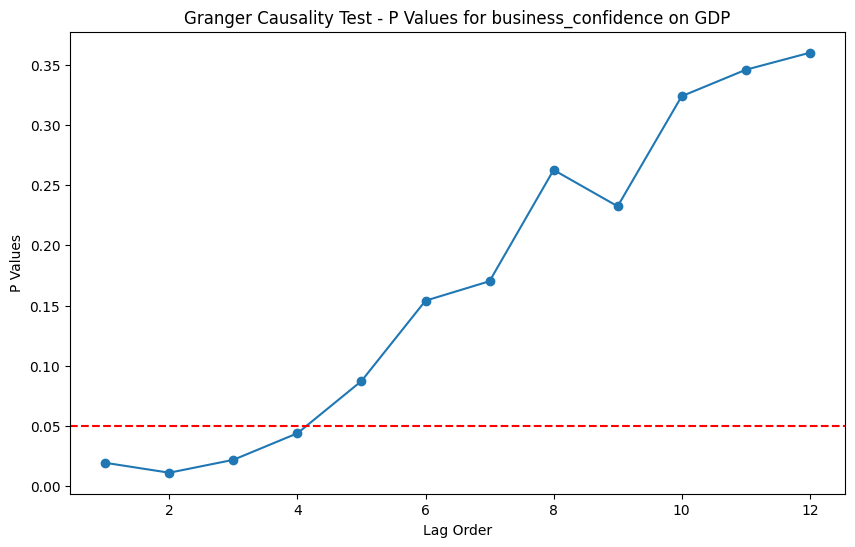

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


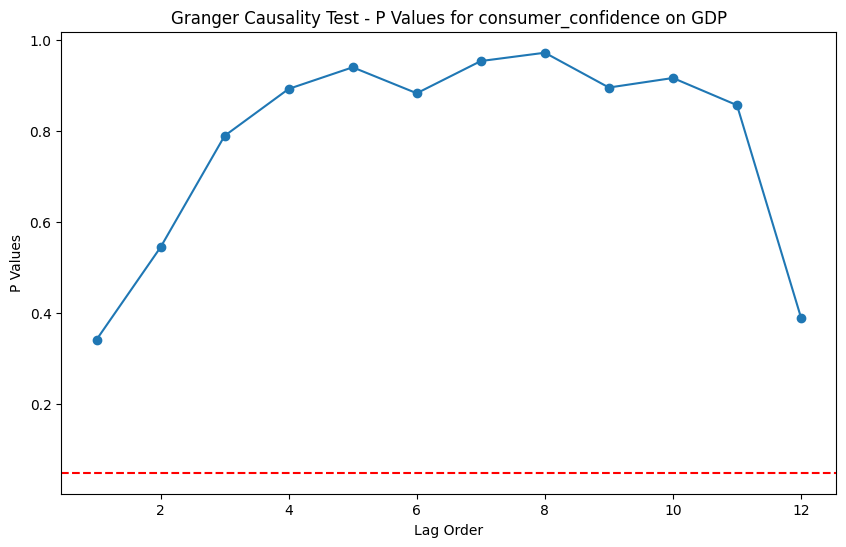

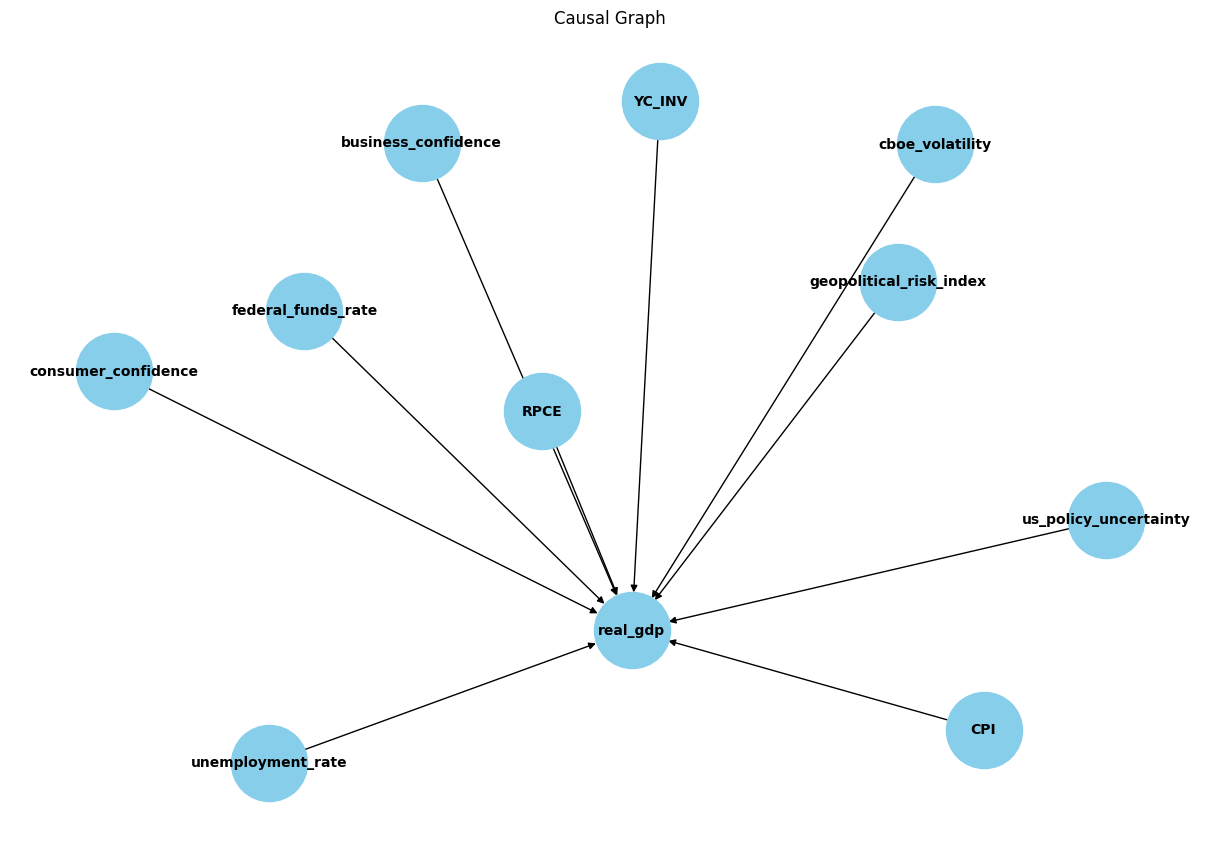

Granger causality test results:
YC_INV_causes_real_gdp: [0.3372768267181385, 0.5630878163755919, 0.6126339652248678, 0.6481392157848395, 0.708527309202316, 0.7948013420498088, 0.8592559474822725, 0.7599738207466941, 0.8003129030614374, 0.8724382302714739, 0.9018068904136539, 0.8270531936537017]
RPCE_causes_real_gdp: [0.0008652308719716611, 5.607462308674755e-05, 0.0001426739282152583, 0.0006441242398145728, 0.0017593961592846728, 0.003304362830396974, 0.002301905332230117, 0.003958024244095847, 0.003796380538417281, 0.0060497934371354055, 0.006938723563135048, 0.012023598880708565]
unemployment_rate_causes_real_gdp: [0.03268724547943913, 0.0034190293500619743, 0.006430438014317798, 0.012147810622917239, 0.019992593362795227, 0.018749986581899226, 0.020353925709539786, 0.03000174030903273, 0.05205667060167192, 0.05731618427065485, 0.09040494058363202, 0.0941718474756795]
federal_funds_rate_causes_real_gdp: [0.46893235164921154, 0.8592509448363796, 0.9416768297577377, 0.9706544989990739,

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Define the simulate_data function
def simulate_data():
    start_date = '1992-01-01'
    end_date = '2020-01-31'
    dates = pd.date_range(start=start_date, end=end_date, freq='M')
    n = len(dates)
    
    # Define ARMA process for real_gdp
    ar_params = np.array([1, -0.5])
    ma_params = np.array([1, 0.5])
    ar = np.r_[1, -ar_params]  # add zero-lag and negate
    ma = np.r_[1, ma_params]   # add zero-lag
    arma_process = ArmaProcess(ar, ma)
    
    # Generate synthetic GDP data
    np.random.seed(42)
    real_gdp = 2 + arma_process.generate_sample(nsample=n)
    
    # Generate other economic indicators with some correlation to real_gdp
    yc_inv = (np.random.rand(n) > 0.8).astype(int)  # binary inversion indicator
    rpce = 0.2 + 0.1 * real_gdp + np.random.normal(0, 0.05, n)
    unemployment_rate = 5 + 0.2 * real_gdp + np.random.normal(0, 0.5, n)
    federal_funds_rate = 2 + 0.1 * real_gdp + np.random.normal(0, 0.5, n)
    cpi = 0.2 + 0.1 * real_gdp + np.random.normal(0, 0.05, n)
    us_policy_uncertainty = 100 + 5 * real_gdp + np.random.normal(0, 20, n)
    geopolitical_risk_index = 50 + 2 * real_gdp + np.random.normal(0, 10, n)
    cboe_volatility = 15 + 0.5 * real_gdp + np.random.normal(0, 2, n)
    business_confidence = 100 + 2 * real_gdp + np.random.normal(0, 10, n)
    consumer_confidence = 100 + 2 * real_gdp + np.random.normal(0, 10, n)

    # Combine into DataFrame
    df = pd.DataFrame({
        'real_gdp': real_gdp,
        'YC_INV': yc_inv,
        'RPCE': rpce,
        'unemployment_rate': unemployment_rate,
        'federal_funds_rate': federal_funds_rate,
        'CPI': cpi,
        'us_policy_uncertainty': us_policy_uncertainty,
        'geopolitical_risk_index': geopolitical_risk_index,
        'cboe_volatility': cboe_volatility,
        'business_confidence': business_confidence,
        'consumer_confidence': consumer_confidence
    }, index=dates)

    return df

# Simulate Data
data = simulate_data()

# Log transformation and differencing for stationarity
data_transformed = data.copy()
for column in data.columns:
    if column != "YC_INV":
        data_transformed[column] = np.log(data[column])
        data_transformed[column] = data_transformed[column].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure there are no NaN or infinite values in the transformed data
data_transformed = data_transformed.dropna()

# Perform Augmented Dickey-Fuller (ADF) Test
adf_results = {}
for var in data_transformed.columns:
    result = adfuller(data_transformed[var])
    adf_results[var] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

# Print ADF results
for var, result in adf_results.items():
    print(f'ADF Test for {var}:')
    print(f'ADF Statistic: {result["ADF Statistic"]}')
    print(f'p-value: {result["p-value"]}')
    for key, value in result['Critical Values'].items():
        print(f'Critical Value {key}: {value}')
    print()

# Plot histograms and time series for selected variables
selected_variables = ['real_gdp', 'YC_INV', 'RPCE', 'unemployment_rate', 'federal_funds_rate', 
                      'CPI', 'us_policy_uncertainty', 'geopolitical_risk_index', 
                      'cboe_volatility', 'business_confidence', 'consumer_confidence']

for var in selected_variables:
    plt.figure(figsize=(10, 6))
    data_transformed[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + var)
    plt.show()

    plt.figure(figsize=(10, 6))
    data_transformed[var].plot()
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.title('Line Graph of ' + var)
    plt.show()

# Perform Granger Causality Test for selected variables
variables_to_test = ['YC_INV', 'RPCE', 'unemployment_rate', 'federal_funds_rate', 
                     'CPI', 'us_policy_uncertainty', 'geopolitical_risk_index', 
                     'cboe_volatility', 'business_confidence', 'consumer_confidence']

granger_results = {}
for var in variables_to_test:
    results = grangercausalitytests(data_transformed[['real_gdp', var]], maxlag=12, verbose=False)
    lag_orders = sorted(results.keys())
    p_values = [results[lag_order][0]['ssr_ftest'][1] for lag_order in lag_orders]
    
    plt.figure(figsize=(10, 6))
    plt.plot(lag_orders, p_values, marker='o', linestyle='-')
    plt.xlabel('Lag Order')
    plt.ylabel('P Values')
    plt.title(f'Granger Causality Test - P Values for {var} on GDP')
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.show()
    
    granger_results[f'{var}_causes_real_gdp'] = p_values

# Create and visualize causal graph using networkx
edges = [
    ('YC_INV', 'real_gdp'),
    ('RPCE', 'real_gdp'),
    ('unemployment_rate', 'real_gdp'),
    ('federal_funds_rate', 'real_gdp'),
    ('CPI', 'real_gdp'),
    ('us_policy_uncertainty', 'real_gdp'),
    ('geopolitical_risk_index', 'real_gdp'),
    ('cboe_volatility', 'real_gdp'),
    ('business_confidence', 'real_gdp'),
    ('consumer_confidence', 'real_gdp')
]

G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Causal Graph')
plt.show()

# Print Granger causality results
print("Granger causality test results:")
for key, value in granger_results.items():
    print(f"{key}: {value}")


In [21]:
'''
Interpretations:

ADF test results:

real_gpd, YC_INV, RPCE, unemployment_rate, federal_funds_rate, CPI, us_policy_uncertainity, geopolitical risk, cboe_volatility, business confidence, and consumer_confidence are all stationary


Granger causality test results:


Significant Predictors:

- RPCE (Real Personal Consumption Expenditures) is a strong predictor of real_gdp, with significant p-values at all lags.
- unemployment_rate can predict real_gdp for lags up to 10 months.
- CPI (Consumer Price Index) can predict real_gdp for lags up to 5 months.
- business_confidence can predict real_gdp for lags up to 4 months.

Non-significant Predictors:

- YC_INV (Yield Curve Inversion), federal_funds_rate, us_policy_uncertainty, geopolitical_risk_index, cboe_volatility, and consumer_confidence do not significantly predict real_gdp at any tested lags in this synthetic dataset.


'''

'\nInterpretations:\n'